<center>
<h1><u>Fake News Detection using Machine Learning Classifiers | Natural Language Processing (NLP)</u></h1>
<h3>Author: Ola Sanusi, PhD</h3>
</center>

___

# Background

___

Fake news has been dominating social and online news media in recent years. Fake news can be considered as unverified, inaccurate, and maliciously distorted information that are not easy to distinguish from genuine news (Jang, Park, & Seo, 2019). I can conclude that fake news are news content that have been verified to be false by fact checkers. However, there are no agreed upon definition of the term `fake news`. One thing that can be generally be agreed upon is that fake news encapsulate pieces of information that are generally false, hoaxes, misleading or exaggerated. A conceptual framework created by Wardle and Derakhsan (2017) can help us better understand fake news. This conceptual model presented in figure 1 fake news into 3: (1) mis-information (2) dis-information (3) mal-information.

![fake news](C:\Users\lanre\Documents\data_science\fakenews.png)

**Figure 1: Conceptual framework explaining fake news. Source: Wardle and Derakhsan (2017)**

Fake news weakens the legitimacy of media institutions because the false information disseminated by fake news spread faster and deeper consequently reaching larger audience(Bozarth & Budak, 2020). The coverage and spread of false information is alarming. For example, during the 2016 U.S election campaign, the top 20 discussed fake election information generated about 8 million reactions, shares and comments on Facebook while on the other hand, genuine/real news from the larger news websites garner about 7.3 million comments, reactions and shares (Zhou, Jain, Phoha, & Zafarani, 2020). It is therefore imperative that fake news is detected in its earlier phase before it reaches a broad audience since is it now extremely difficult for the general public to distinguish fake news from credible/genuine/real news (Bozarth & Budak, 2020). 

___

# Problem Statement

___

Due to the explosion of fake news and the fact that fake news reaches more audience than real/genuine news. It is very important that there is a way to quickly identify which news is fake or real so that they can be removed immediately in order to reduce the number of people it reach. We should be able to use machine learning algorithms to study word patterns in fake and real news to be able to distinguish which news is fake or real.

___

## Preparing the Dataset

___

The dataset used was obtained from [Fake News Corpus](https://github.com/several27/FakeNewsCorpus/releases/tag/v1.0) on GitHub. The Corpus (27 GB) contains zipped dataset of news articles with about 8.5 million instances, a total of 17 feature columns and 11 categories in the label column. This Corpus was previously used in my [Georgetown University Data Science Capstone project](https://github.com/georgetown-analytics/From-Russia-With-Love-fake-news-).  Due to the size of the dataset and limitation of PC, initial data preparation to get rid of unneeded columns and rows were performed on AWS Sagemaker studio with higher memory VMs. The notebook that contains all the steps performed to get data into a managable size that can be processed on my local PC is hosted on my GitHub. 

## Loading Libraries and Data

In [1]:
%%writefile contractions.py
# Dictionary of English Contractions to be used in data preprocessing

CONTRACTION_DICT = { "ain't": "is not",
                    "aren't": "are not",
                    "can't": "cannot",
                    "can't've": "cannot have",
                    "'cause": "because",
                    "could've": "could have",
                    "couldn't": "could not",
                    "couldn't've": "could not have",
                    "didn't": "did not",
                    "doesn't": "does not",
                    "don't": "do not",
                    "hadn't": "had not",
                    "hadn't've": "had not have",
                    "hasn't": "has not",
                    "haven't": "have not",
                    "he'd": "he would",
                    "he'd've": "he would have",
                    "he'll": "he will",
                    "he'll've": "he he will have",
                    "he's": "he is",
                    "how'd": "how did",
                    "how'd'y": "how do you",
                    "how'll": "how will",
                    "how's": "how is",
                    "I'd": "I would",
                    "I'd've": "I would have",
                    "I'll": "I will",
                    "I'll've": "I will have",
                    "I'm": "I am",
                    "I've": "I have",
                    "i'd": "i would",
                    "i'd've": "i would have",
                    "i'll": "i will",
                    "i'll've": "i will have",
                    "i'm": "i am",
                    "i've": "i have",
                    "isn't": "is not",
                    "it'd": "it would",
                    "it'd've": "it would have",
                    "it'll": "it will",
                    "it'll've": "it will have",
                    "it's": "it is",
                    "let's": "let us",
                    "ma'am": "madam",
                    "mayn't": "may not",
                    "might've": "might have",
                    "mightn't": "might not",
                    "mightn't've": "might not have",
                    "must've": "must have",
                    "mustn't": "must not",
                    "mustn't've": "must not have",
                    "needn't": "need not",
                    "needn't've": "need not have",
                    "o'clock": "of the clock",
                    "oughtn't": "ought not",
                    "oughtn't've": "ought not have",
                    "shan't": "shall not",
                    "sha'n't": "shall not",
                    "shan't've": "shall not have",
                    "she'd": "she would",
                    "she'd've": "she would have",
                    "she'll": "she will",
                    "she'll've": "she will have",
                    "she's": "she is",
                    "should've": "should have",
                    "shouldn't": "should not",
                    "shouldn't've": "should not have",
                    "so've": "so have",
                    "so's": "so as",
                    "that'd": "that would",
                    "that'd've": "that would have",
                    "that's": "that is",
                    "there'd": "there would",
                    "there'd've": "there would have",
                    "there's": "there is",
                    "they'd": "they would",
                    "they'd've": "they would have",
                    "they'll": "they will",
                    "they'll've": "they will have",
                    "they're": "they are",
                    "they've": "they have",
                    "to've": "to have",
                    "wasn't": "was not",
                    "we'd": "we would",
                    "we'd've": "we would have",
                    "we'll": "we will",
                    "we'll've": "we will have",
                    "we're": "we are",
                    "we've": "we have",
                    "weren't": "were not",
                    "what'll": "what will",
                    "what'll've": "what will have",
                    "what're": "what are",
                    "what's": "what is",
                    "what've": "what have",
                    "when's": "when is",
                    "when've": "when have",
                    "where'd": "where did",
                    "where's": "where is",
                    "where've": "where have",
                    "who'll": "who will",
                    "who'll've": "who will have",
                    "who's": "who is",
                    "who've": "who have",
                    "why's": "why is",
                    "why've": "why have",
                    "will've": "will have",
                    "won't": "will not",
                    "won't've": "will not have",
                    "would've": "would have",
                    "wouldn't": "would not",
                    "wouldn't've": "would not have",
                    "y'all": "you all",
                    "y'all'd": "you all would",
                    "y'all'd've": "you all would have",
                    "y'all're": "you all are",
                    "y'all've": "you all have",
                    "you'd": "you would",
                    "you'd've": "you would have",
                    "you'll": "you will",
                    "you'll've": "you will have",
                    "you're": "you are",
                    "you've": "you have"
                    }


Overwriting contractions.py


# Loading all important libraries

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
from tqdm.autonotebook import tqdm
tqdm.pandas(desc='Progress bar', leave=False)
import re
import string
import tldextract
import unicodedata2
from contractions import CONTRACTION_DICT
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_string
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb
from yellowbrick.target import ClassBalance
from sklearn.ensemble import ExtraTreesClassifier 
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, PrecisionRecallCurve, ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.contrib.classifier import DecisionViz
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import TruncatedSVD
from yellowbrick.text import FreqDistVisualizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

stopword = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

%matplotlib inline
sns.set(style='darkgrid',palette='Dark2',rc={'figure.figsize':(9,6), 'figure.dpi':90})

<ipython-input-2-8d2056dbaf1c>:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lanre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Set Random seed for reproductibility

In [3]:
seed = 500

### Load the data

The dataset used for this project contains of approximately 2 million instances, binary class (fake and real) in the target variable.

In [4]:
# path to the csv file
csv_file_path = r"C:\Users\lanre\fakenews2mil.csv"

In [5]:
#chunksize for reading the dataset
chunksize = 500000 # 500 thousand rows at one go.

In [6]:
# function to read dataset into pandas dataframe
def read_data(path, chunksize):
    df_chunk=pd.read_csv(path, sep=',', lineterminator='\n' , chunksize=chunksize)
    chunk_list=[chunk for chunk in df_chunk]
    df =pd.concat(chunk_list)
    return df

In [7]:
%%time
df = read_data(csv_file_path, chunksize)

Wall time: 1min 43s


In [8]:
# See memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998792 entries, 0 to 1998791
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   domain   object
 1   title    object
 2   content  object
 3   label    object
dtypes: object(4)
memory usage: 10.3 GB


___

## Examining the Dataset

___

**Checking missing values**

In [9]:
def missing_value(df):
    """" Function to calculate the number and percent of missing values in a dataframe"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_value = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_value

In [10]:
missing_value(df)

,Total,Percent
domain,0,0.0
title,0,0.0
content,0,0.0
label,0,0.0


**Extract domain name from full url**

In [11]:
def extract_domain(url):
    """
    Extract domain name from fld url
    """
    info = tldextract.extract(url)
    return info.domain

In [12]:
df['domain'] = df['domain'].astype(str).apply(extract_domain)
df['domain'] = df['domain'].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998792 entries, 0 to 1998791
Data columns (total 4 columns):
 #   Column   Dtype   
---  ------   -----   
 0   domain   category
 1   title    object  
 2   content  object  
 3   label    object  
dtypes: category(1), object(3)
memory usage: 10.2 GB


**Examine domains by label**

In [13]:
df.groupby('label')['domain'].nunique().reset_index()

,label,domain
0,fake,301
1,real,105


There seems to be more domain with fake news articles than domains with real articles

**Distribution of label classes**

Text(0.5, 1.0, 'Distribution of the label classes')

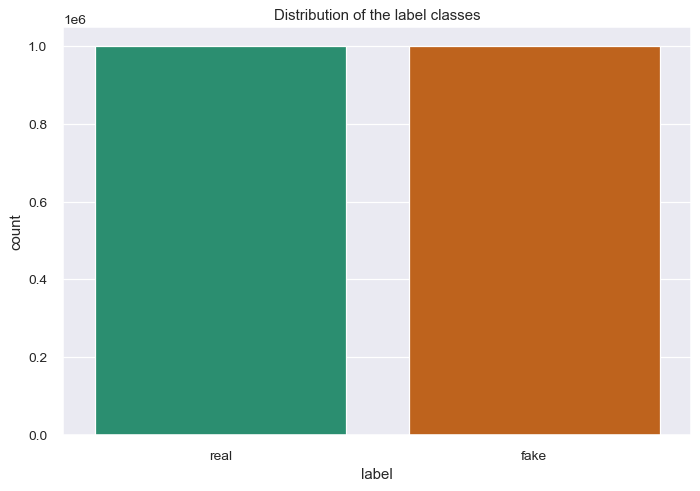

In [14]:
sns.countplot(x='label', data=df).set_title('Distribution of the label classes')

The label classes is fairly evenly distributed with both the fake and real categories each having about 1 million instances

**Number of instances and features in the data**

In [15]:
df.shape
print(f"The dataframe contains: {df.shape[0] } rows and {df.shape[1]} columns")

The dataframe contains: 1998792 rows and 4 columns


**Peeking at the data**

In [16]:
df.head(3)

,domain,title,content,label
0,dailykos,More and more British election talk,Because it's the big story of the night.\n\nUp...,real
1,christianpost,Brian Williams and the Tyranny of Ego,"Expand | Collapse Not available David French, ...",real
2,nakedcapitalism,Comments on: How American Corporations Transfo...,The Bible has an interesting (no pun intended)...,real


## Data Cleaning and Text Preprocessing

Cleaning up the content and title columns by removing all the noises

In [17]:
#The folllowing functions will be used to remove noise such as accented characters, 
#whitespaces and spacial characters, digits, punctuations

def remove_special_characters(text): 
    """
    Removes special characters from the text document
    """
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)

def remove_extra_whitespace_tabs(text): 
    """
    Removes extra whitespaces and remove_extra_whitespace_tabs
    """
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

def remove_digits(text): 
    """
    Remove all digits from the text document
     
    """
    result = ''.join(i for i in text if not i.isdigit()).lower()
    return ' '.join(result.split())

def remove_newlines(text): 
    """
    Remove newline characters from the text document
    """
    return text.replace('\\n', ' ').replace('\\r', ' ').replace('\n', ' ').replace('\r', ' ').replace('\\', ' ')

def remove_accented_chars(text): 
    """
    Removes accented characters from the test
    """
    new_text = unicodedata2.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text


def expand_contractions(text, contraction_mapping=CONTRACTION_DICT):
    """
    Expands contractions found in the text
    """
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def replace_punctuation(text):
    """
    Replace punctuation characters with spaces
    """
    filters = string.punctuation + '”' + '“' + '–' 
    translate_dict = dict((c, " ") for c in filters)   
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    return text

def stops_letters(text):
    """
     Remove stopwords and remove words with 2 or less characters
    """
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stopword:
            result.append(token)
            
    return " ".join(result)


def remove_urls (text):
    """
    Removes any word that starts with either http or https
    """
    
    text = re.sub('http[s]?://\S+', '', text,flags=re.M)
    return(text)


def remove_www (text):
    """
    Remove words that starts with www
    """
    text = re.sub('www\S+', '', text,flags=re.M)
    return(text)




### Applying the functions for Noise Removal

In [18]:
def clean_text(df, colname):
    # Step 1 - convert the text to lower case
    df[colname]=df[colname].apply(lambda x: x.lower())
    #step 2 - Remove URLS
    df[colname]=df[colname].apply(remove_urls)
    #step 3 - Remove www
    df[colname]=df[colname].apply(remove_www)
    # Step 4 - remove special charcaters
    df[colname]=df[colname].apply(remove_special_characters)
    #step 5 - Remove whitespaces and tabs
    df[colname]=df[colname].apply(remove_extra_whitespace_tabs)
    #step 6 - remove newlines and tabs
    df[colname] = df[colname].apply(remove_newlines)
    # step 7 - Remove digits
    df[colname]=df[colname].apply(remove_digits)
    #step 8 - remove accented characters
    df[colname]=df[colname].apply(remove_accented_chars)
    #step 9 - Expand contractions
    df[colname]=df[colname].apply(expand_contractions)
    #step 10 - Replace punctuations with spaces 
    df[colname]= df[colname].apply(replace_punctuation)
    #step 11 - Remove stopwords, tokenize and remove words with 3 letters or less
    df[colname]= df[colname].apply(stops_letters)
    return df

In [19]:
%%time
df = clean_text(df, 'title')

Wall time: 4min 16s


In [20]:
%%time
df = clean_text(df, 'content')

Wall time: 3h 23min 29s


#### Lemmatize the title and content columns

In [21]:
def lemmatized_word(text):
    """
    lemmatize the text to get its root form
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return  " ".join(lemmatized_word) #combine the words into a giant string that vectorizer can accept


In [22]:
%%time
df['content'] = df['content'].progress_apply(lemmatized_word)
df['title'] = df['title'].progress_apply(lemmatized_word)


Progress bar:   0%|          | 0/1998792 [00:00<?, ?it/s]

Progress bar:   0%|          | 0/1998792 [00:00<?, ?it/s]

Wall time: 1h 7min 53s


___

## Feature engineering and Text Vectorization

___

Additional features were created to show the number of words and characters in the content and title columns

In [23]:
%%time
#creating new features

# word counts
df['words_content'] = df["content"].apply(lambda x: len(str(x).split(" ")))
df['words_title'] = df["title"].apply(lambda x: len(str(x).split(" ")))

# Character counts
df['characters_content'] = df["content"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['characters_title'] = df["title"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

#average word length
df['avg_word_content'] = df['characters_content'] / df['words_content']
df['avg_word_title'] = df['characters_title'] / df['words_title']


Wall time: 1min 33s


**Rearranged the order of the columns**

In [24]:
df = df[['domain','title','content','words_content','words_title','characters_content','characters_title','avg_word_content','avg_word_title','label']]
df.head(3)

,domain,title,content,words_content,words_title,characters_content,characters_title,avg_word_content,avg_word_title,label
0,dailykos,british election talk,story night update official labour one surpris...,23,3,140,19,6.086957,6.333333,real
1,christianpost,brian williams tyranny,expand collapse available david french harvard...,235,3,1568,20,6.672340,6.666667,real
2,nakedcapitalism,comment american corporation transformed produ...,bible interesting intended profit profit good ...,57,6,382,53,6.701754,8.833333,real


#### Features and target variables

In [25]:
target = df.label
features = df[['title','content','words_content','words_title','characters_content','characters_title','avg_word_content','avg_word_title']].copy()

Features considered excluded the domain column because of the imbalance in the distribution of domain by label classes and from the result of my Georgeotown ncapstone group project that suggested that the domain is responsible for the overfitting of all the models.  According to the results from the [Georgetown University Data Science Capstone project](https://github.com/georgetown-analytics/From-Russia-With-Love-fake-news-), the classifiers seems to be learning domain-specific features as opposed to the actual word patterns that distinguish fake news from real news articles



#### Splitting Data into Trainning and Test

In [26]:
#Splitting the data without the domain
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=seed)
print(df.shape); print(X_train.shape); print(X_test.shape)

(1998792, 10)
(1599033, 8)
(399759, 8)


## Checking the distribution of classes in the target

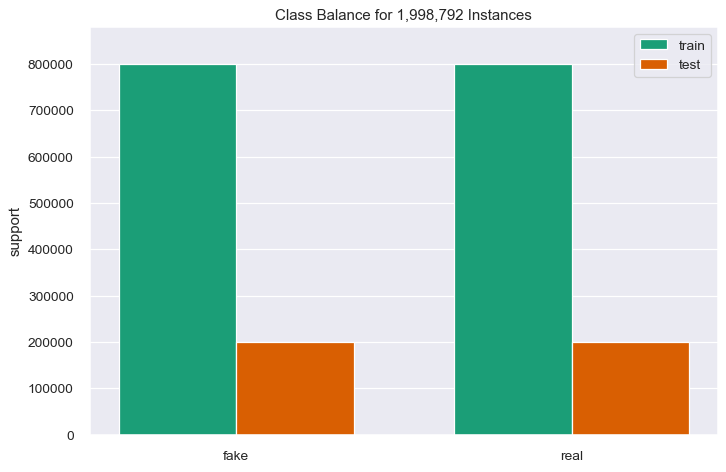

<AxesSubplot:title={'center':'Class Balance for 1,998,792 Instances'}, ylabel='support'>

In [27]:
# Instantiate the visualizer
viz = ClassBalance(labels=["fake", "real"])

viz.fit(y_train, y_test)        # Fit the data to the visualizer
viz.show()                      # Finalize and render the figure

## Applying ColumnTransformer

In [28]:
# defining the numerical, categorical and textual features
numerical = ['words_content','words_title','characters_content','characters_title','avg_word_content','avg_word_title']
#categorical = ['domain']
textual = ['title','content']

Scaled the numerical features using MinMaxScaler and utilized unigram in vectorization of the textual features.

In [29]:

ct = ColumnTransformer(
    [('num', MinMaxScaler(), numerical),
     ('title', TfidfVectorizer(max_features = 6000, stop_words = 'english', ngram_range=(1,1)), 'title'),
     ('content', TfidfVectorizer(max_features = 6000, stop_words = 'english', ngram_range=(1,1)), 'content')], n_jobs=3, verbose=True)

## Text Vectorization

In [30]:
%%time
# Creating the feature matrix
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print(f'Shape of Term Frequency Matrix of train: {X_train.shape}')
print(f'Shape of Term Frequency Matrix of test: {X_test.shape}')

Shape of Term Frequency Matrix of train: (1599033, 12006)
Shape of Term Frequency Matrix of test: (399759, 12006)
Wall time: 11min 48s


I decided to normalize the sparse feature matrix because I plan to also use neural network for model training. MaxAbsScaler was used to normalize the sparse feature matrix before deeing into the ML classifiers for model training

In [31]:
%%time
# fit scaler on training data
transformer = MaxAbsScaler()

# transform training data
X_train_norm = transformer.fit_transform(X_train)

# transform testing dataabs
X_test_norm = transformer.transform(X_test)

print(f'Shape of Term Frequency Matrix of train: {X_train_norm.shape}')
print(f'Shape of Term Frequency Matrix of test: {X_test_norm.shape}')

Shape of Term Frequency Matrix of train: (1599033, 12006)
Shape of Term Frequency Matrix of test: (399759, 12006)
Wall time: 20.1 s


## Encoding the label

In [32]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)
print(y_train.shape); print(y_test.shape)

(1599033,)
(399759,)


In [33]:
# identify the classes
classes = Encoder.classes_
classes

array(['fake', 'real'], dtype=object)

___

# Models training and predictions

___

Several machine learning classifiers was used in model training and prediction. These classifiers belong to individual algorithms, ensemble algorithims and neural network algorithms.
1. Individual algorithims
    - Logistic Regression
    - Linear SVC
    - Multinomial Naive Bayes
    - Decision Tree
    - Stochastic Gradient Descent Classifier
2. Ensemble Algorithims
    - Random Forest
    - Extra Trees
    - Adaboost
    - LightGBM
    - XGBoost
3. Neural Network Algorithims
    - Multiple Layer Perceptron Classifier
    - Deep Neural Network

1. Logistic Regression

In [34]:
%%time
lr = LogisticRegression()

lr.fit(X_train_norm,y_train)

y_pred_lr = lr.predict(X_test_norm)
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.36 %
Wall time: 1min 12s


### Checking the model for overfitting

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lr.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(lr.score(X_test_norm, y_test)))

Training set score: 0.8882
Test set score: 0.8836


2. Multinomial Naive Bayes

In [36]:
%%time
# MultinomialNB
mnb = MultinomialNB()

mnb.fit(X_train_norm,y_train)

y_pred_nb = mnb.predict(X_test_norm)
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 79.33 %
Wall time: 1.4 s


### Checking the model for overfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(mnb.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(mnb.score(X_test_norm, y_test)))

Training set score: 0.7938
Test set score: 0.7933


3. Linear Support Vector Machine Classifier 

In [38]:
%%time
# Linear SVC
lsvc = LinearSVC(C=0.01, dual=False, random_state=seed)
# Training the model 
lsvc.fit(X_train_norm, y_train) 

#Predict the Test using linear svc
y_pred_lsvc = lsvc.predict(X_test_norm)

score_lsvc = round(accuracy_score(y_pred_lsvc,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_lsvc)+" %")

The accuracy score achieved using Linear SVM is: 88.16 %
Wall time: 1min 39s


### Checking the model for overfitting

In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lsvc.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(lsvc.score(X_test_norm, y_test)))

Training set score: 0.8853
Test set score: 0.8816


4. Decision Tree Classifier

In [40]:
%%time
dt = DecisionTreeClassifier(max_depth=25, random_state=seed)
dt.fit(X_train_norm,y_train)
y_pred_dt = dt.predict(X_test_norm)


score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 83.22 %
Wall time: 1h 23min 9s
Parser   : 151 ms


### Checking the model for overfitting

In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test_norm, y_test)))

Training set score: 0.8476
Test set score: 0.8322


5. Random Forest Classifier

In [42]:
%%time
rf = RandomForestClassifier(n_estimators=50, random_state=seed)
rf.fit(X_train_norm,y_train)
y_pred_rf = rf.predict(X_test_norm)

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.33 %
Wall time: 9h 52min 20s


### Checking the model for overfitting

In [43]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test_norm, y_test)))

Training set score: 1.0000
Test set score: 0.9033


6. Extra Trees Classifier

In [44]:
%%time
extra_tree = ExtraTreesClassifier(n_estimators=50, criterion ='entropy', n_jobs=-1, random_state=seed) 
extra_tree.fit(X_train_norm,y_train)
y_pred_et = extra_tree.predict(X_test_norm)

score_et = round(accuracy_score(y_pred_et,y_test)*100,2)

print("The accuracy score achieved using Extra Trees is: "+str(score_et)+" %")


The accuracy score achieved using Extra Trees is: 89.82 %
Wall time: 8h 57min 1s


### Checking the model for overfitting

In [45]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(extra_tree.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(extra_tree.score(X_test_norm, y_test)))

Training set score: 1.0000
Test set score: 0.8982


7. XGBoost Classifier

In [46]:
%%time
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=seed)
xgb_model.fit(X_train_norm, y_train)

y_pred_xgb = xgb_model.predict(X_test_norm)

score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

[23:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score achieved using XGBoost is: 89.14 %
Wall time: 57min 54s
Parser   : 149 ms


### Checking the model for overfitting

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb_model.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(xgb_model.score(X_test_norm, y_test)))

Training set score: 0.8945
Test set score: 0.8914


8. SGDClassifier

In [48]:
%%time
# SGDClassifier
sgdc = SGDClassifier(max_iter=2500,random_state=seed)
# Training the model 
sgdc.fit(X_train_norm, y_train) 

y_pred_sgdc = sgdc.predict(X_test_norm)

score_sgdc = round(accuracy_score(y_pred_sgdc,y_test)*100,2)

print("The accuracy score achieved using SGDClassifier is: "+str(score_sgdc)+" %")

The accuracy score achieved using SGDClassifier is: 87.25 %
Wall time: 9.18 s
Parser   : 167 ms


### Checking the model for overfitting

In [49]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(sgdc.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(sgdc.score(X_test_norm, y_test)))

Training set score: 0.8750
Test set score: 0.8725


9. AdaBoost Classifier

In [50]:
%%time
ada = AdaBoostClassifier(random_state=seed) 
ada.fit(X_train_norm,y_train)
y_pred_ad = ada.predict(X_test_norm)

score_ad = round(accuracy_score(y_pred_ad,y_test)*100,2)

print("The accuracy score achieved using AdaBoost is: "+str(score_ad)+" %")

The accuracy score achieved using AdaBoost is: 81.79 %
Wall time: 1h 13min 56s


### Checking the model for overfitting

In [51]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(ada.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(ada.score(X_test_norm, y_test)))

Training set score: 0.8178
Test set score: 0.8179


10. Multiple Layer Perceptron Classifier

In [52]:
%%time
#Initializing the MLPClassifier
mlp  =          MLPClassifier(
                hidden_layer_sizes=(50,), 
                max_iter=300,
                activation = 'relu',
                solver='adam',
                random_state=seed)

#Fitting the training data to the network
mlp.fit(X_train_norm, y_train)

#Predicting y for X_val
y_pred_mlp = mlp.predict(X_test_norm)


score_mlp = round(accuracy_score(y_pred_mlp,y_test)*100,2)

print("The accuracy score achieved using Multi layer perceptron is: "+str(score_mlp)+" %")

The accuracy score achieved using Multi layer perceptron is: 90.66 %
Wall time: 5h 58min 13s


### Checking the model for overfitting

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(mlp.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(mlp.score(X_test_norm, y_test)))

Training set score: 0.9980
Test set score: 0.9066


11. LightGBM Classifier

In [54]:
%%time
#instantiate lightgbm
lgb = lgb.LGBMClassifier()
#fit model to training data
lgb.fit(X_train_norm, y_train)
# predict the results
y_pred_lgb=lgb.predict(X_test_norm)
# view accuracy
score_lgb = round(accuracy_score(y_pred_lgb,y_test)*100,2)

print("The accuracy score achieved using LightGBM  is: "+str(score_lgb)+" %")



The accuracy score achieved using LightGBM  is: 88.55 %
Wall time: 11min 17s


### Checking the model for overfitting

In [55]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(lgb.score(X_train_norm, y_train)))

print('Test set score: {:.4f}'.format(lgb.score(X_test_norm, y_test)))

Training set score: 0.8869
Test set score: 0.8855


12. Deep Neural Network using Keras

In [56]:
%%time

model = Sequential()
model.add(Dense(units=48,activation='relu',input_dim=X_train_norm.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                576336    
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 577,537
Trainable params: 577,537
Non-trainable params: 0
_________________________________________________________________
Wall time: 15.5 s


In [57]:
%%time
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit model
history=model.fit(X_train_norm,y_train,epochs=20, validation_data=(X_test_norm, y_test), verbose=2)

# predict probabilities for test set
y_pred_nn = model.predict(X_test_norm)


rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

Epoch 1/20
49970/49970 - 390s - loss: 0.2692 - accuracy: 0.8804 - val_loss: 0.2259 - val_accuracy: 0.8984
Epoch 2/20
49970/49970 - 352s - loss: 0.2353 - accuracy: 0.8986 - val_loss: 0.2174 - val_accuracy: 0.9033
Epoch 3/20
49970/49970 - 352s - loss: 0.2238 - accuracy: 0.9050 - val_loss: 0.2139 - val_accuracy: 0.9057
Epoch 4/20
49970/49970 - 353s - loss: 0.2173 - accuracy: 0.9085 - val_loss: 0.2132 - val_accuracy: 0.9066
Epoch 5/20
49970/49970 - 353s - loss: 0.2125 - accuracy: 0.9109 - val_loss: 0.2111 - val_accuracy: 0.9069
Epoch 6/20
49970/49970 - 359s - loss: 0.2093 - accuracy: 0.9127 - val_loss: 0.2110 - val_accuracy: 0.9074
Epoch 7/20
49970/49970 - 354s - loss: 0.2063 - accuracy: 0.9141 - val_loss: 0.2111 - val_accuracy: 0.9079
Epoch 8/20
49970/49970 - 357s - loss: 0.2044 - accuracy: 0.9152 - val_loss: 0.2109 - val_accuracy: 0.9081
Epoch 9/20
49970/49970 - 355s - loss: 0.2025 - accuracy: 0.9160 - val_loss: 0.2107 - val_accuracy: 0.9081
Epoch 10/20
49970/49970 - 354s - loss: 0.2012 

In [58]:
%%time
# predict classes for test set
y_pred=np.round(model.predict_classes(X_test_norm))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Wall time: 16.1 s


### Checking the model for overfitting

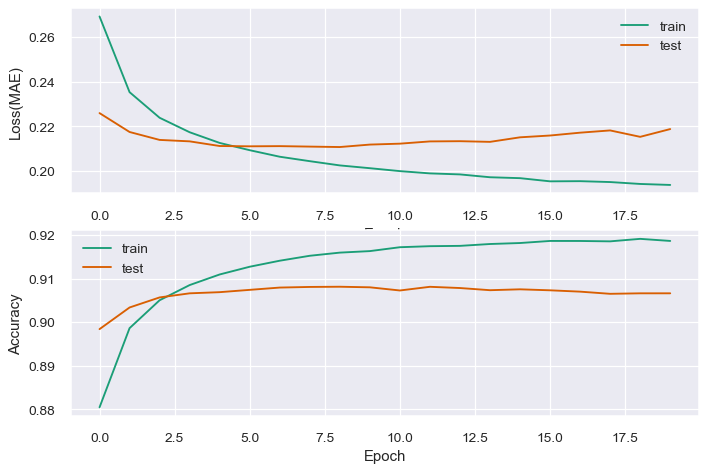

In [59]:
# plot loss during training
plt.subplot(211)
#plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss(MAE)')
plt.legend()
# plot accuracy during training
plt.subplot(212)
#plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

____

# Model Evaluations and and Selection

___

In order to evaluate the performance of the models, I considered accuracy score and recall. Yellowbrick was used to plot the confusion matrix, classification report and class prediction error for majority of the machine learning algorithims. However, for the deep neural network, I used scki-kit learn metrics to generate accuracy score, classification report and plotted the accuracy and loss for the train and test obtained from the Keras model training.

1. Logistic Regression

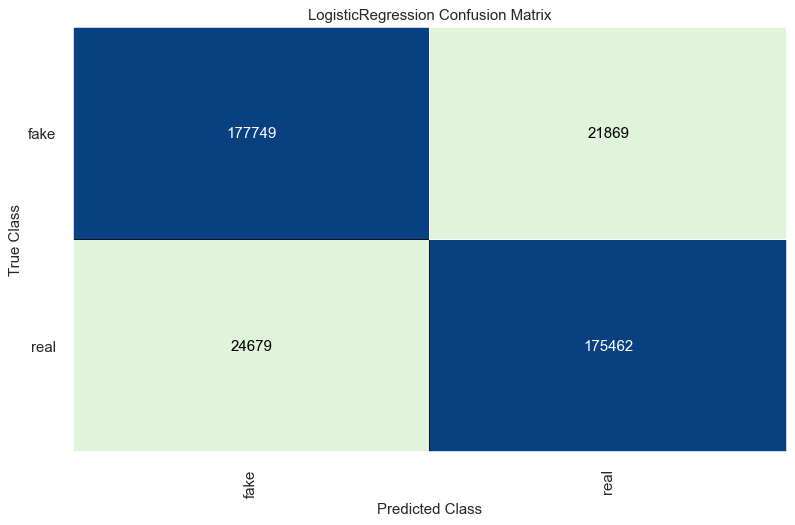

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
cm1 = ConfusionMatrix(lr, classes=classes, cmap='GnBu')
cm1.fit(X_train_norm, y_train)
cm1.score(X_test_norm, y_test)
cm1.show()

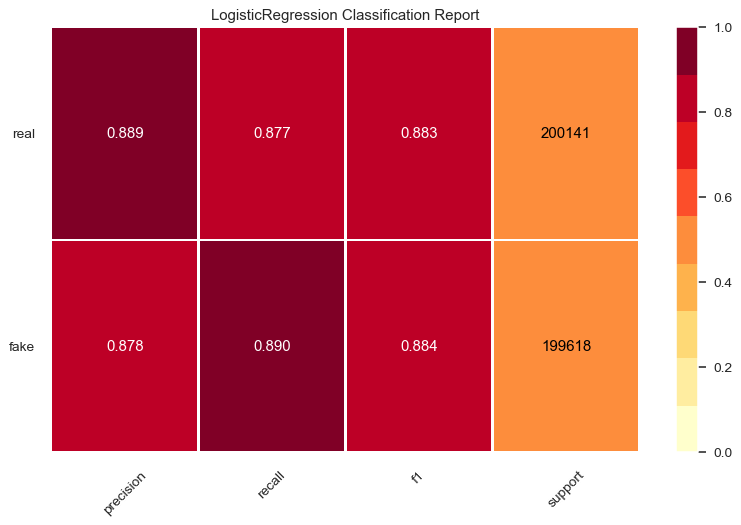

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [61]:
cr1 = ClassificationReport(lr, classes=classes, support=True)
cr1.fit(X_train_norm, y_train)
cr1.score(X_test_norm, y_test)
cr1.show()

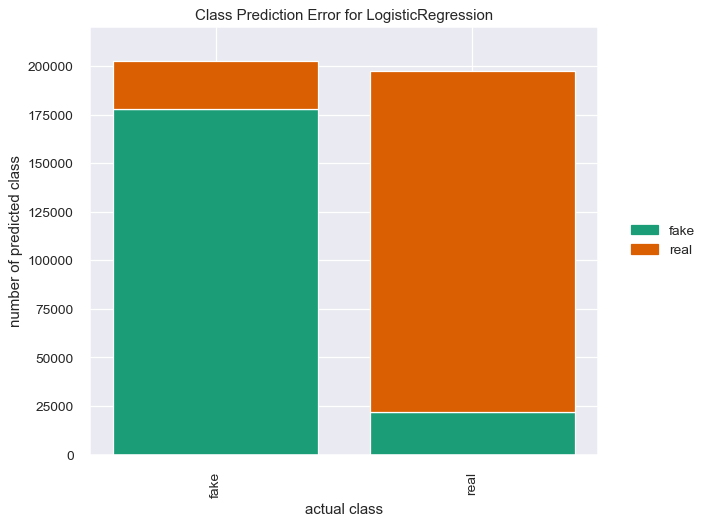

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [62]:
cpe1 = ClassPredictionError(lr, classes=classes)
cpe1.fit(X_train_norm, y_train)
cpe1.score(X_test_norm, y_test)
cpe1.show()

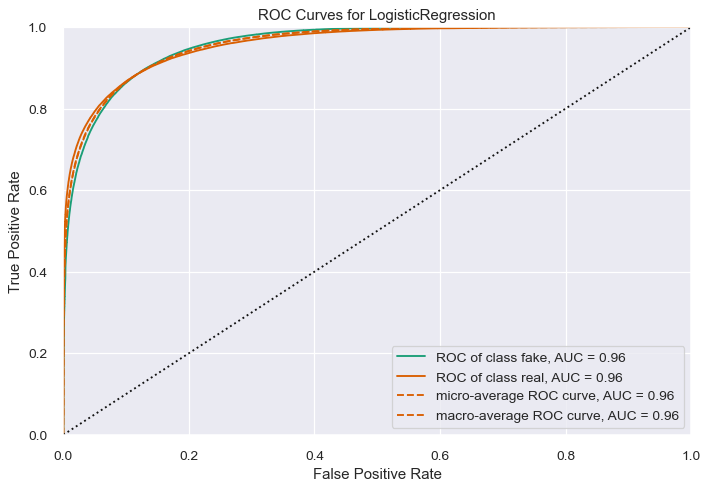

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
rocauc1 = ROCAUC(lr, classes=classes)
rocauc1.fit(X_train_norm, y_train)
rocauc1.score(X_test_norm, y_test)
rocauc1.show()

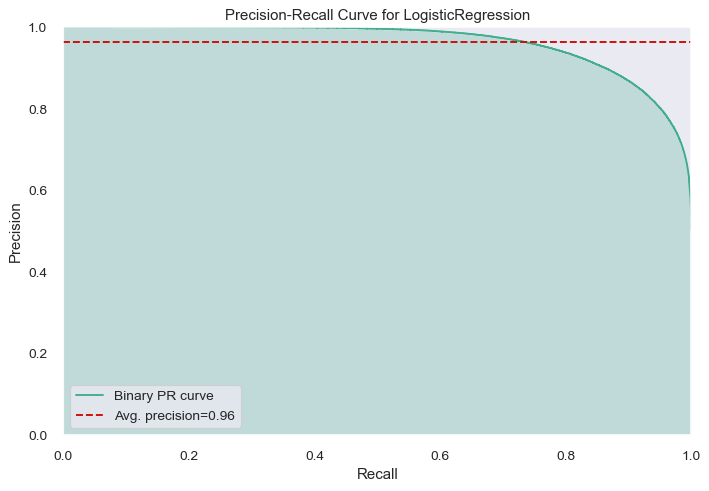

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [64]:
prc1 = PrecisionRecallCurve(lr)
prc1.fit(X_train_norm, y_train)
prc1.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc1.show()

2. Multinomial Naive Bayes

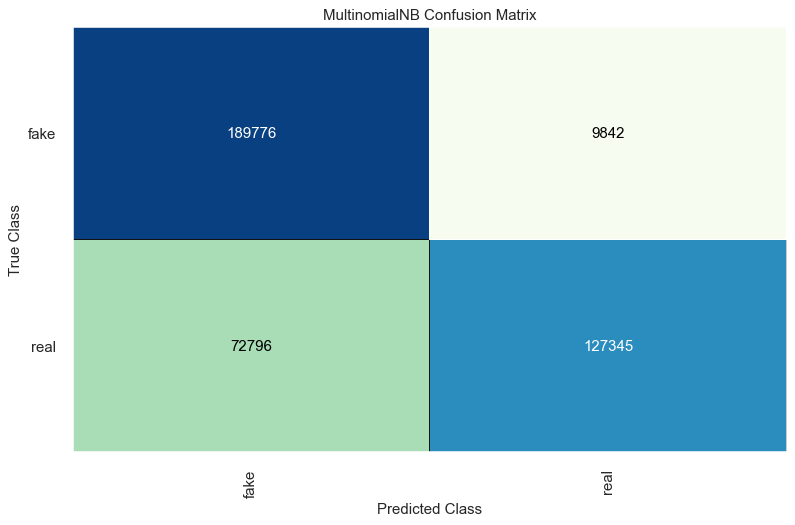

<AxesSubplot:title={'center':'MultinomialNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
cm2 = ConfusionMatrix(mnb, classes=classes, cmap='GnBu')
cm2.fit(X_train_norm, y_train)
cm2.score(X_test_norm, y_test)
cm2.show()

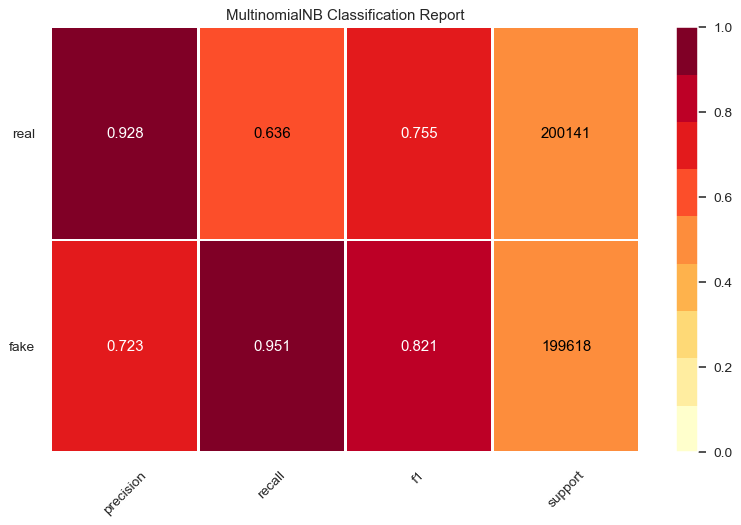

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

In [66]:
cr2 = ClassificationReport(mnb, classes=classes, support=True)
cr2.fit(X_train_norm, y_train)
cr2.score(X_test_norm, y_test)
cr2.show()

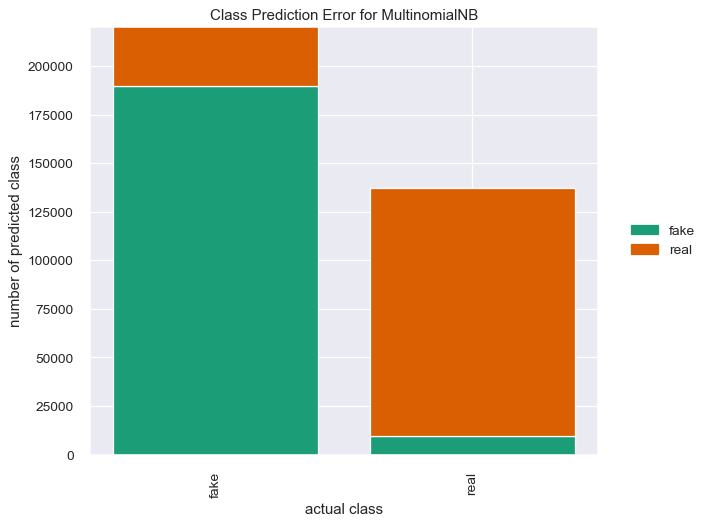

<AxesSubplot:title={'center':'Class Prediction Error for MultinomialNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [67]:
cpe2 = ClassPredictionError(mnb, classes=classes)
cpe2.fit(X_train_norm, y_train)
cpe2.score(X_test_norm, y_test)
cpe2.show()

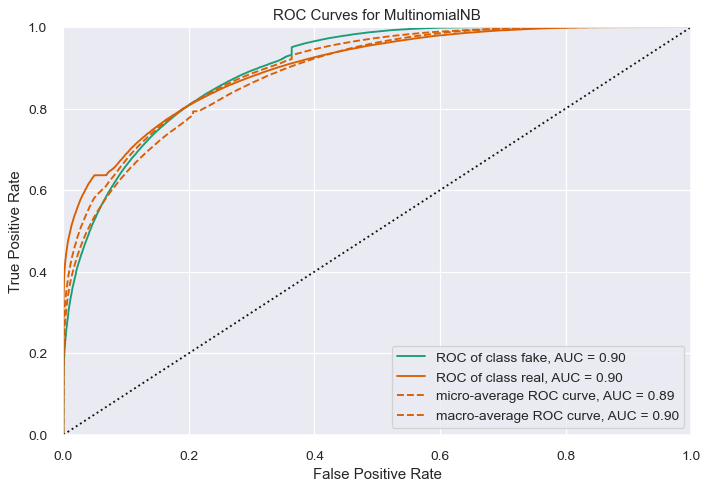

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [68]:
rocauc2 = ROCAUC(mnb, classes=classes)
rocauc2.fit(X_train_norm, y_train)
rocauc2.score(X_test_norm, y_test)
rocauc2.show()

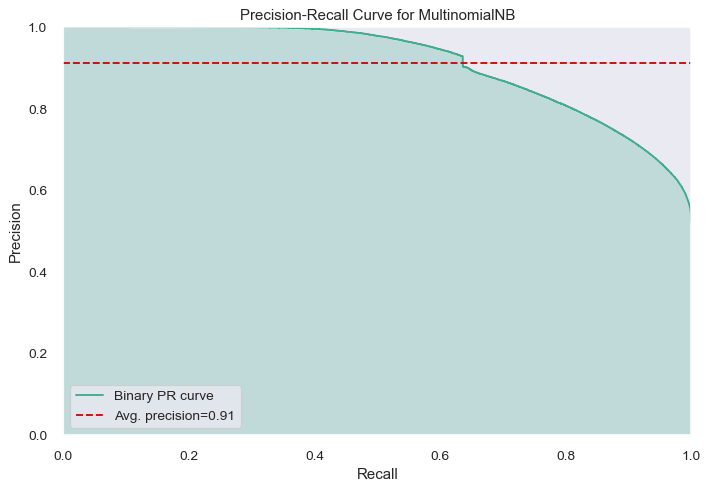

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [69]:
prc2 = PrecisionRecallCurve(mnb)
prc2.fit(X_train_norm, y_train)
prc2.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc2.show()

3. Linear Support Vector Machine Classifier 

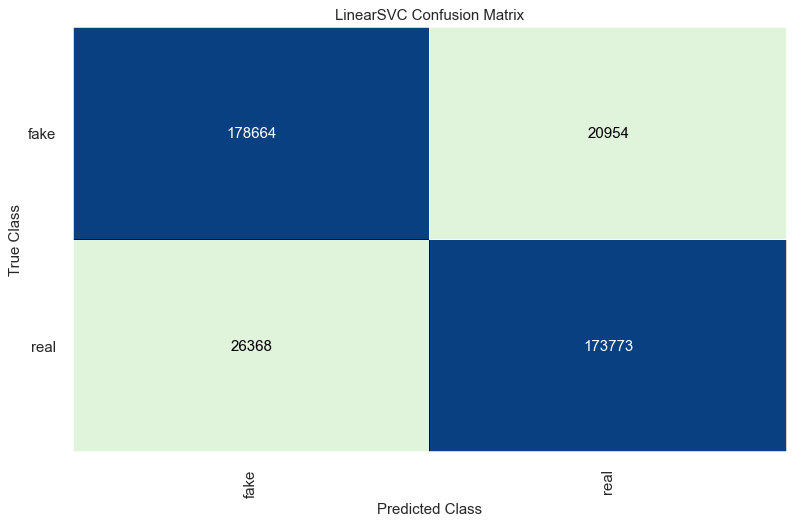

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
cm3 = ConfusionMatrix(lsvc, classes=classes, cmap='GnBu')
cm3.fit(X_train_norm, y_train)
cm3.score(X_test_norm, y_test)
cm3.show()

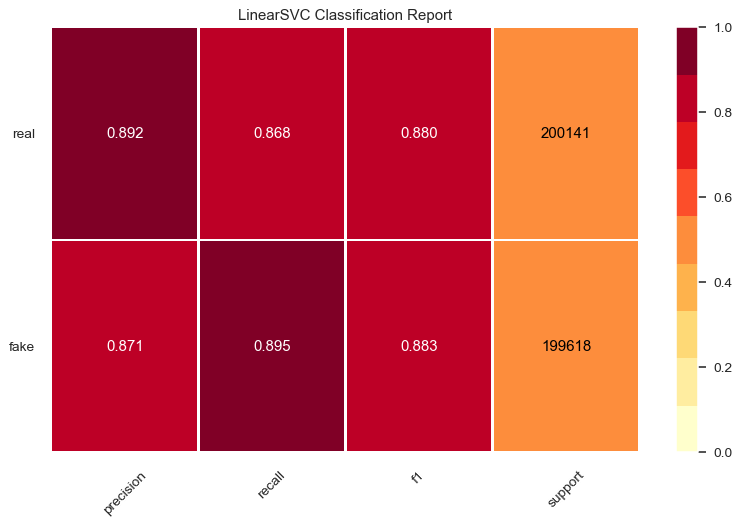

<AxesSubplot:title={'center':'LinearSVC Classification Report'}>

In [71]:
cr3 = ClassificationReport(lsvc, classes=classes, support=True)
cr3.fit(X_train_norm, y_train)
cr3.score(X_test_norm, y_test)
cr3.show()

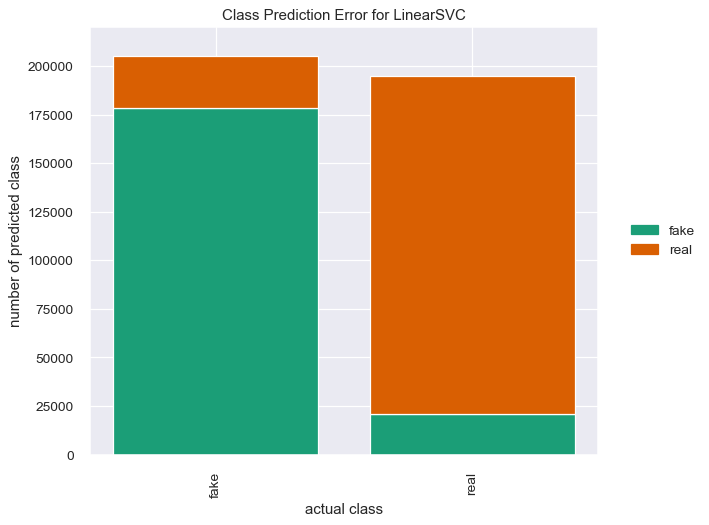

<AxesSubplot:title={'center':'Class Prediction Error for LinearSVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [72]:
cpe3 = ClassPredictionError(lsvc, classes=classes)
cpe3.fit(X_train_norm, y_train)
cpe3.score(X_test_norm, y_test)
cpe3.show()

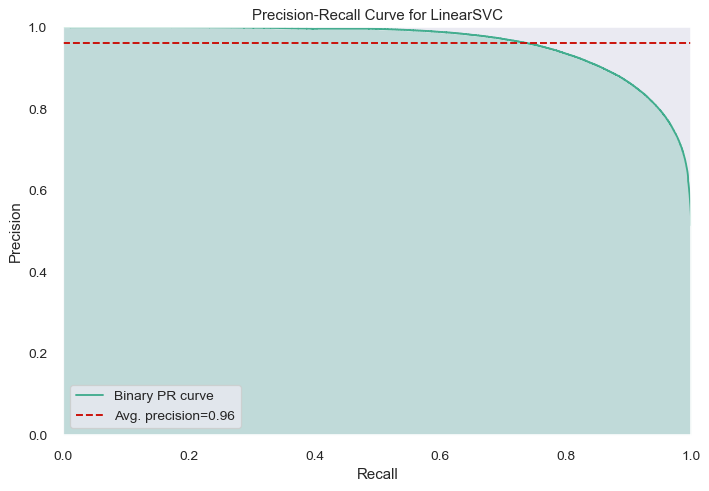

<AxesSubplot:title={'center':'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [74]:
prc3 = PrecisionRecallCurve(lsvc)
prc3.fit(X_train_norm, y_train)
prc3.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc3.show()

4. Decision Tree Classifier

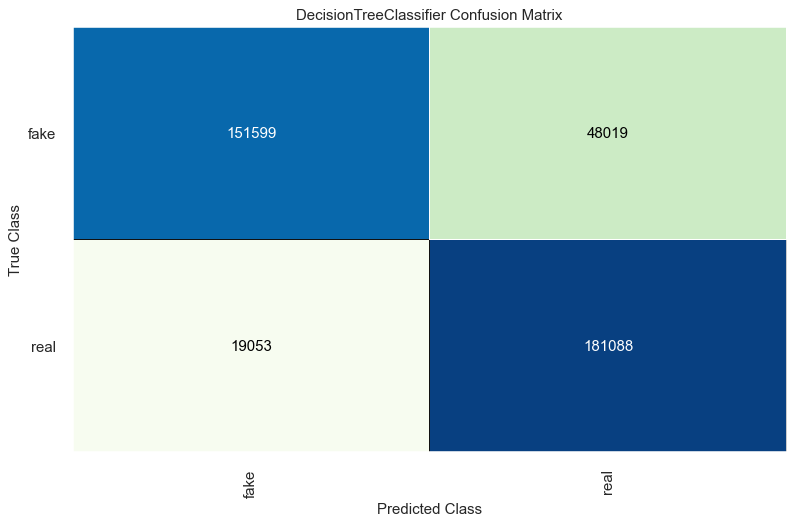

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [75]:
cm4 = ConfusionMatrix(dt, classes=classes, cmap='GnBu')
cm4.fit(X_train_norm, y_train)
cm4.score(X_test_norm, y_test)
cm4.show()

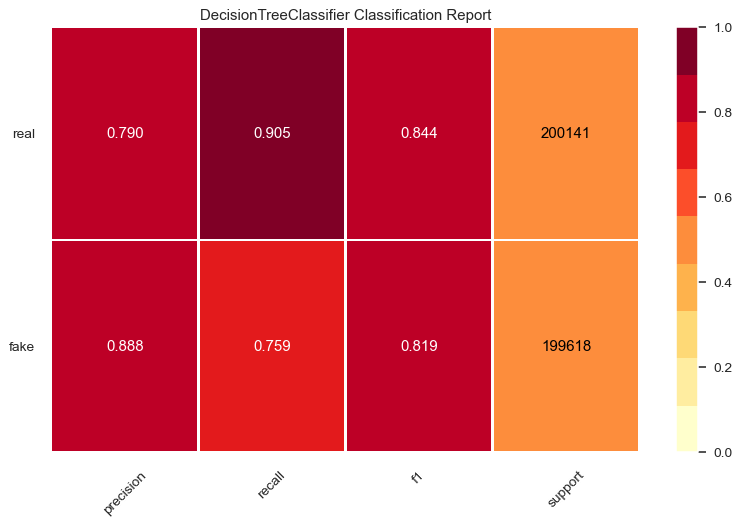

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [76]:
cr4 = ClassificationReport(dt, classes=classes, support=True)
cr4.fit(X_train_norm, y_train)
cr4.score(X_test_norm, y_test)
cr4.show()

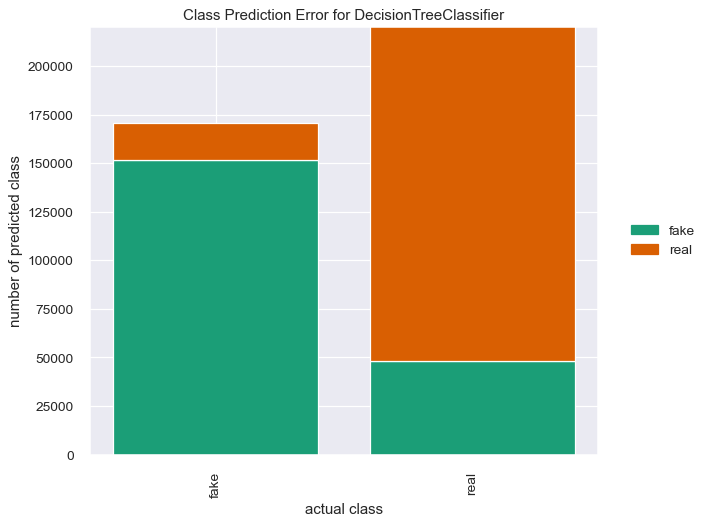

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [77]:
cpe4 = ClassPredictionError(dt, classes=classes)
cpe4.fit(X_train_norm, y_train)
cpe4.score(X_test_norm, y_test)
cpe4.show()

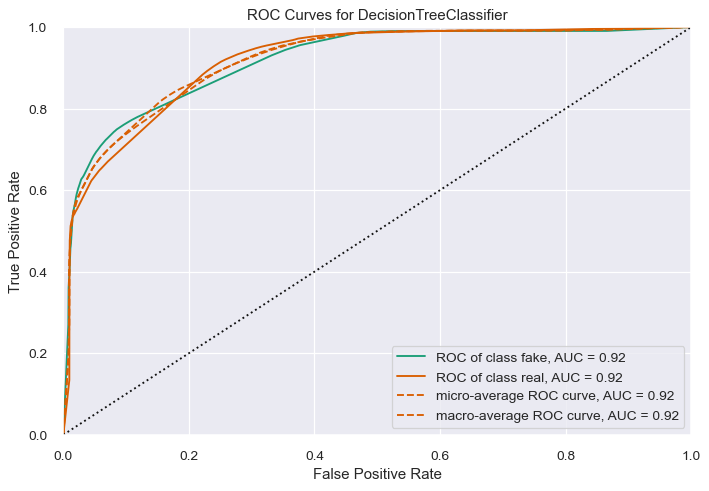

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [78]:
rocauc4 = ROCAUC(dt, classes=classes)
rocauc4.fit(X_train_norm, y_train)
rocauc4.score(X_test_norm, y_test)
rocauc4.show()

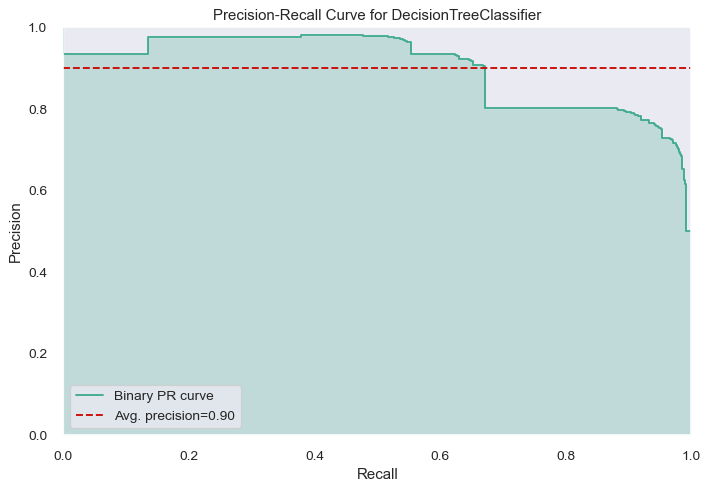

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [79]:
prc4 = PrecisionRecallCurve(dt)
prc4.fit(X_train_norm, y_train)
prc4.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc4.show()

5. Random Forest Classifier

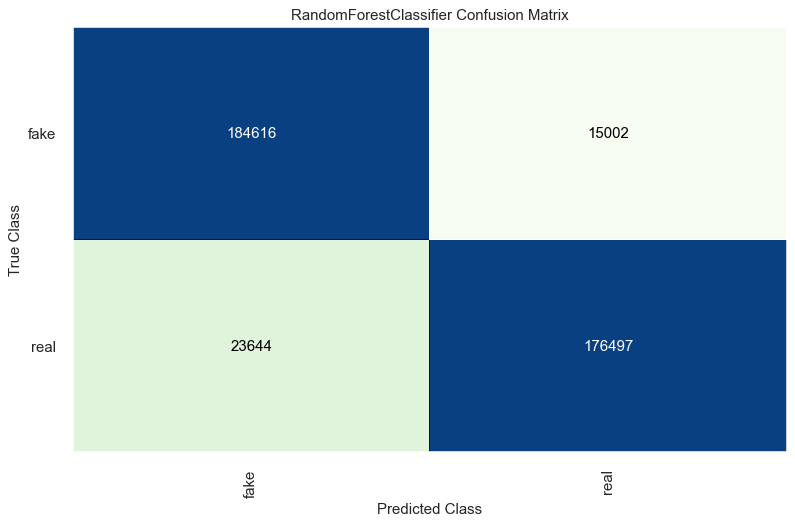

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [80]:
cm5 = ConfusionMatrix(rf, classes=classes, cmap='GnBu')
cm5.fit(X_train_norm, y_train)
cm5.score(X_test_norm, y_test)
cm5.show()

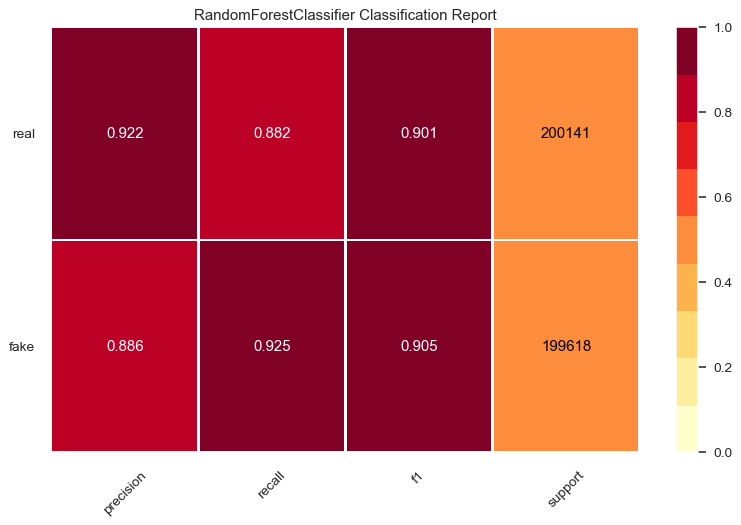

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [81]:
cr5 = ClassificationReport(rf, classes=classes, support=True)
cr5.fit(X_train_norm, y_train)
cr5.score(X_test_norm, y_test)
cr5.show()

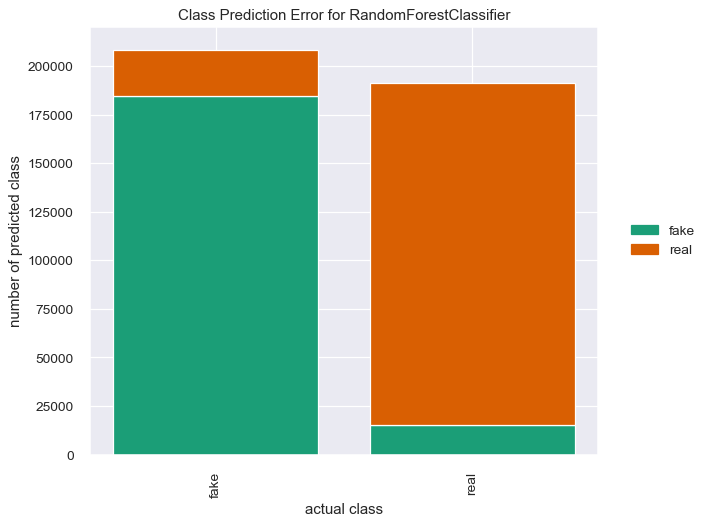

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [82]:
cpe5 = ClassPredictionError(rf, classes=classes)
cpe5.fit(X_train_norm, y_train)
cpe5.score(X_test_norm, y_test)
cpe5.show()

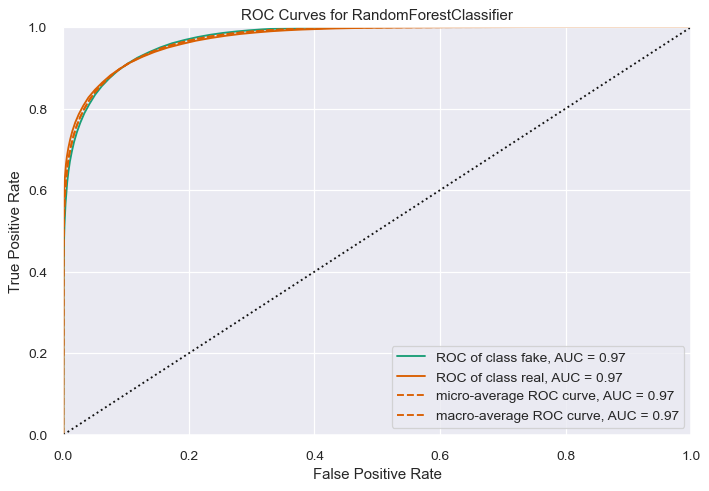

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
rocauc5 = ROCAUC(rf, classes=classes)
rocauc5.fit(X_train_norm, y_train)
rocauc5.score(X_test_norm, y_test)
rocauc5.show()

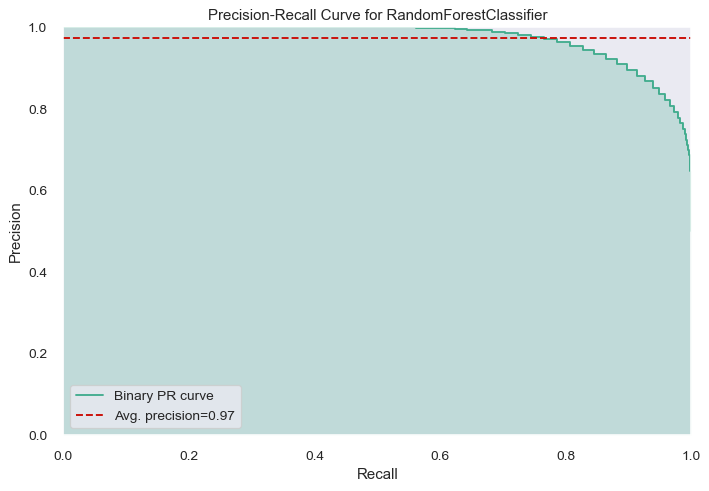

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [84]:
prc5 = PrecisionRecallCurve(rf)
prc5.fit(X_train_norm, y_train)
prc5.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc5.show()

6. Extra Trees Classifier

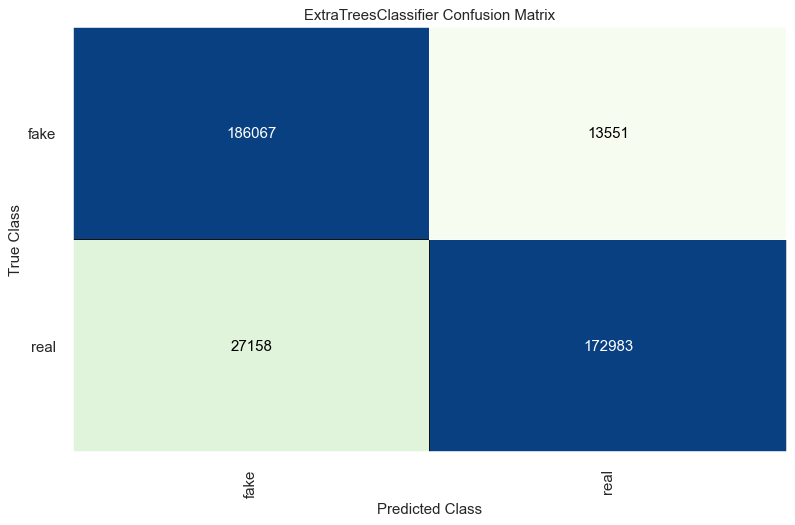

<AxesSubplot:title={'center':'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [85]:
cm6 = ConfusionMatrix(extra_tree, classes=classes, cmap='GnBu')
cm6.fit(X_train_norm, y_train)
cm6.score(X_test_norm, y_test)
cm6.show()

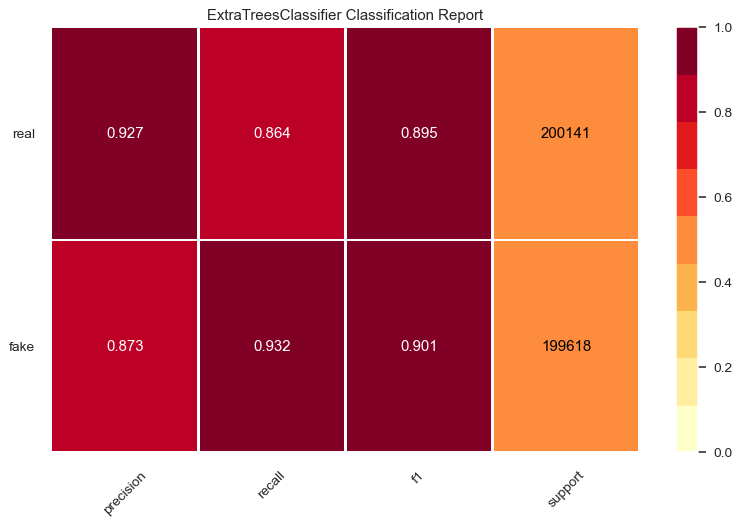

<AxesSubplot:title={'center':'ExtraTreesClassifier Classification Report'}>

In [86]:
cr6 = ClassificationReport(extra_tree, classes=classes, support=True)
cr6.fit(X_train_norm, y_train)
cr6.score(X_test_norm, y_test)
cr6.show()

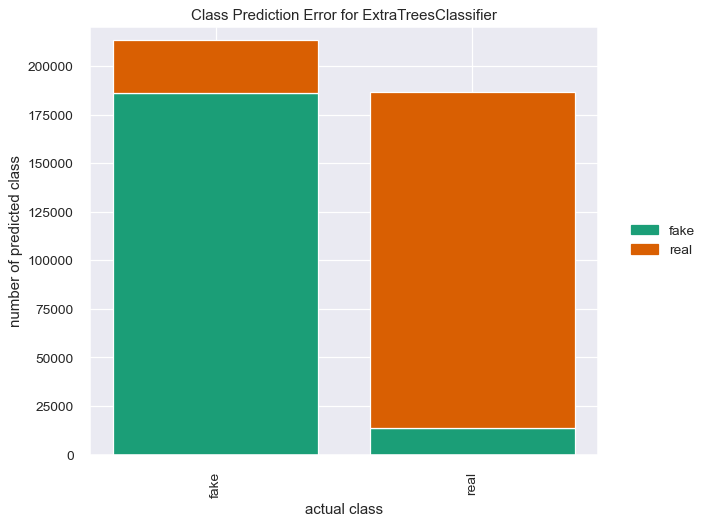

<AxesSubplot:title={'center':'Class Prediction Error for ExtraTreesClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [87]:
cpe6 = ClassPredictionError(extra_tree, classes=classes)
cpe6.fit(X_train_norm, y_train)
cpe6.score(X_test_norm, y_test)
cpe6.show()

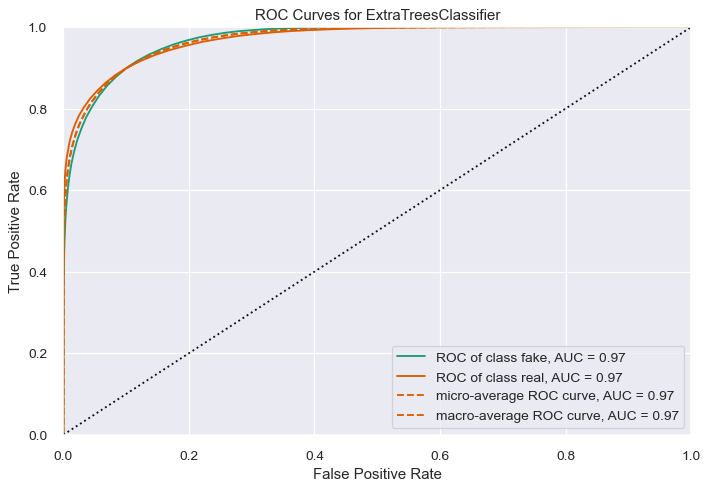

<AxesSubplot:title={'center':'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [88]:
rocauc6 = ROCAUC(extra_tree, classes=classes)
rocauc6.fit(X_train_norm, y_train)
rocauc6.score(X_test_norm, y_test)
rocauc6.show()

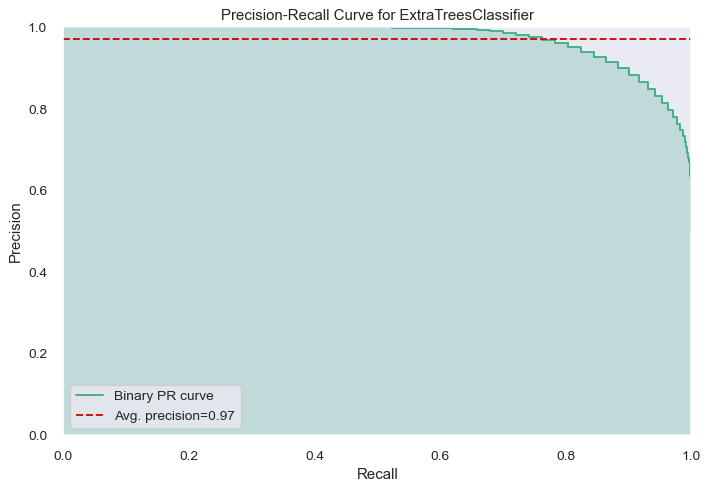

<AxesSubplot:title={'center':'Precision-Recall Curve for ExtraTreesClassifier'}, xlabel='Recall', ylabel='Precision'>

In [89]:
prc6 = PrecisionRecallCurve(extra_tree)
prc6.fit(X_train_norm, y_train)
prc6.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc6.show()

7. XGBoost Classifier

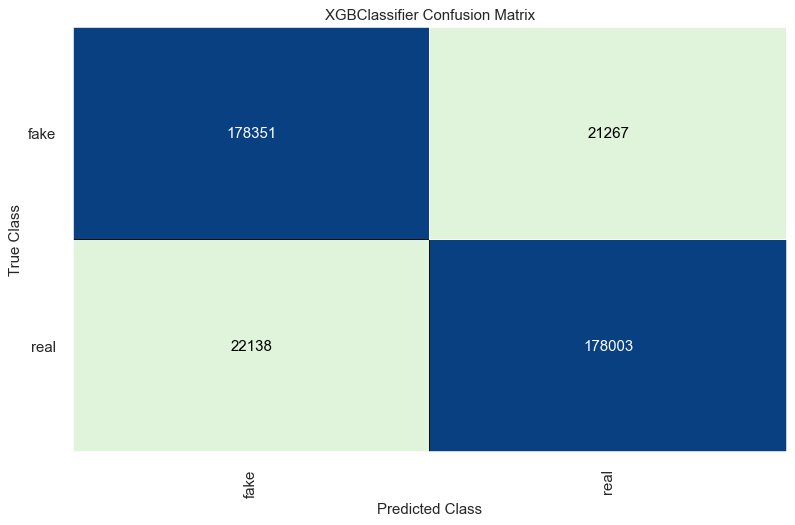

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [90]:
cm7 = ConfusionMatrix(xgb_model, classes=classes, cmap='GnBu')
cm7.fit(X_train_norm, y_train)
cm7.score(X_test_norm, y_test)
cm7.show()

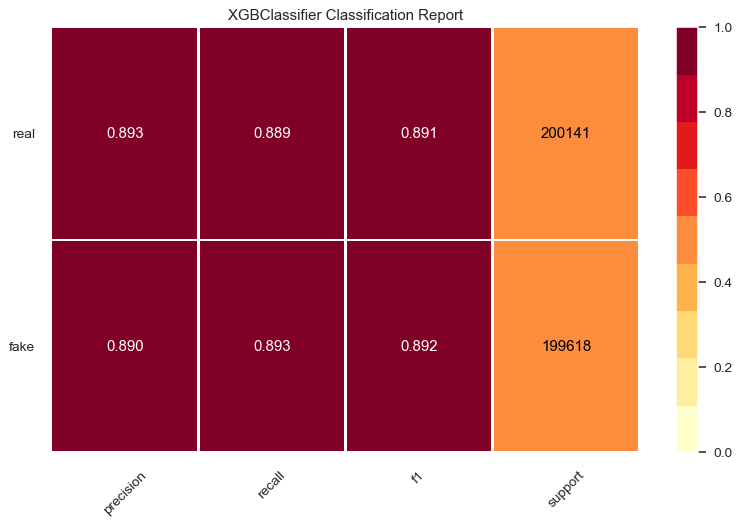

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [91]:
cr7 = ClassificationReport(xgb_model, classes=classes, support=True)
cr7.fit(X_train_norm, y_train)
cr7.score(X_test_norm, y_test)
cr7.show()

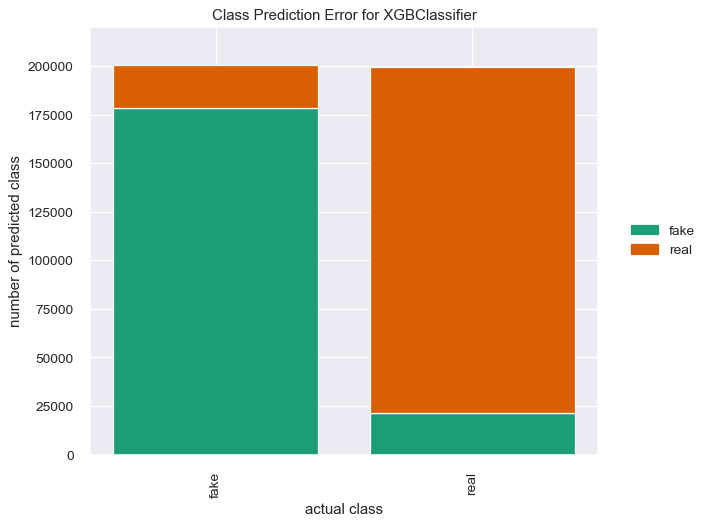

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [92]:
cpe7 = ClassPredictionError(xgb_model, classes=classes)
cpe7.fit(X_train_norm, y_train)
cpe7.score(X_test_norm, y_test)
cpe7.show()

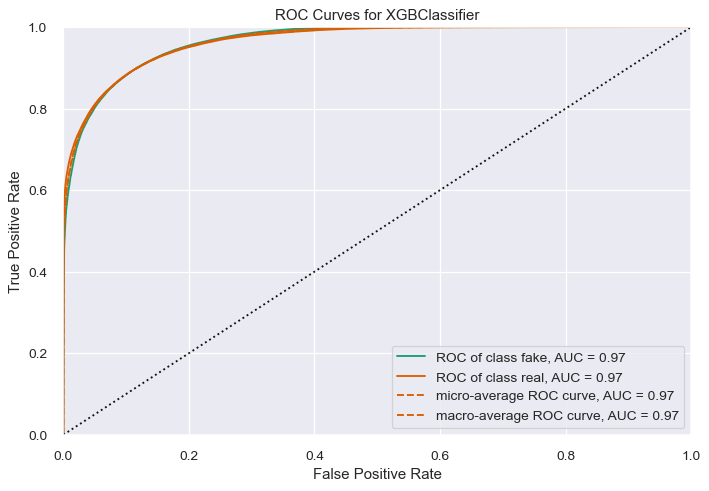

<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [93]:
rocauc7 = ROCAUC(xgb_model, classes=classes)
rocauc7.fit(X_train_norm, y_train)
rocauc7.score(X_test_norm, y_test)
rocauc7.show()

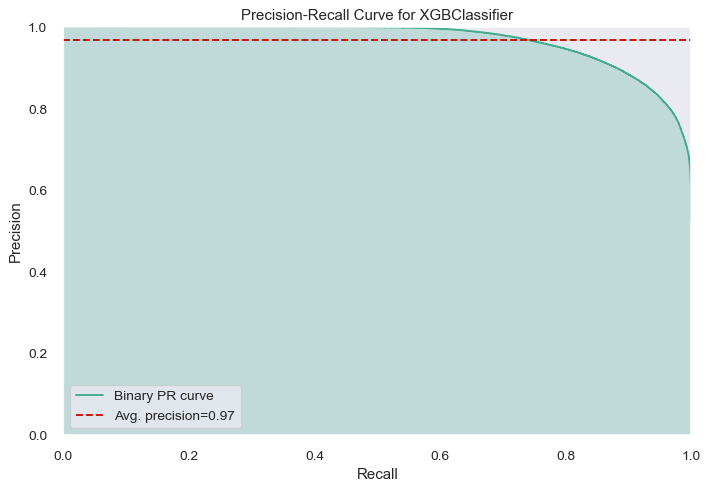

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [94]:
prc7 = PrecisionRecallCurve(xgb_model)
prc7.fit(X_train_norm, y_train)
prc7.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc7.show()

8. SGDClassifier

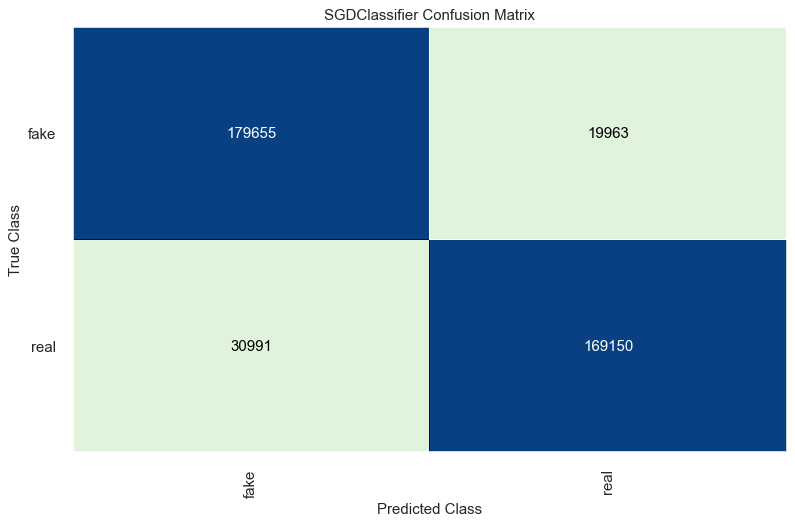

<AxesSubplot:title={'center':'SGDClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [95]:
cm8 = ConfusionMatrix(sgdc, classes=classes, cmap='GnBu')
cm8.fit(X_train_norm, y_train)
cm8.score(X_test_norm, y_test)
cm8.show()

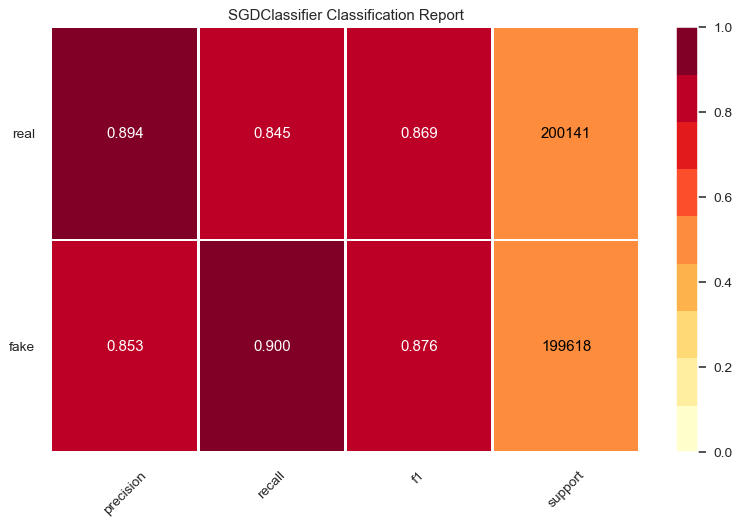

<AxesSubplot:title={'center':'SGDClassifier Classification Report'}>

In [96]:
cr8 = ClassificationReport(sgdc, classes=classes, support=True)
cr8.fit(X_train_norm, y_train)
cr8.score(X_test_norm, y_test)
cr8.show()

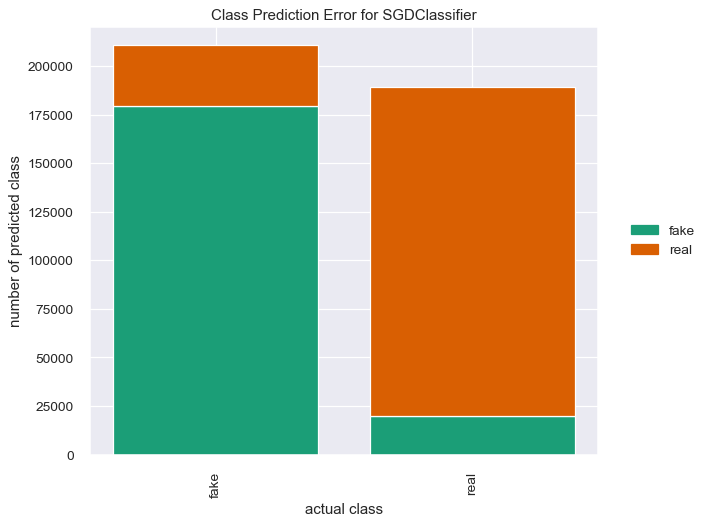

<AxesSubplot:title={'center':'Class Prediction Error for SGDClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [97]:
cpe8 = ClassPredictionError(sgdc, classes=classes)
cpe8.fit(X_train_norm, y_train)
cpe8.score(X_test_norm, y_test)
cpe8.show()

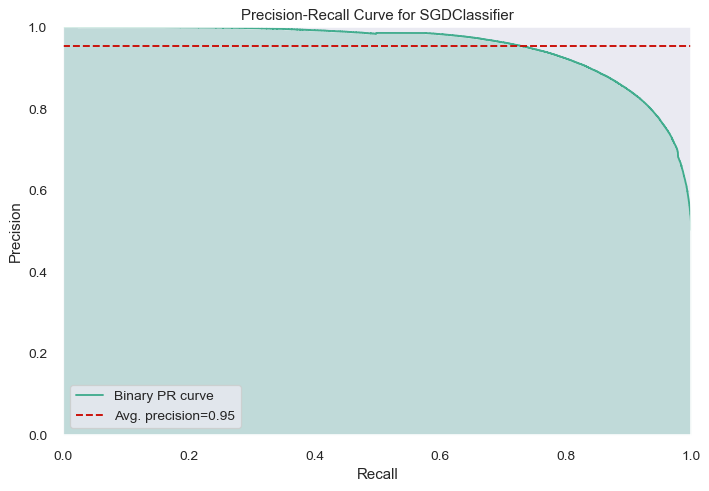

<AxesSubplot:title={'center':'Precision-Recall Curve for SGDClassifier'}, xlabel='Recall', ylabel='Precision'>

In [99]:
prc8 = PrecisionRecallCurve(sgdc)
prc8.fit(X_train_norm, y_train)
prc8.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc8.show()

9. AdaBoost Classifier

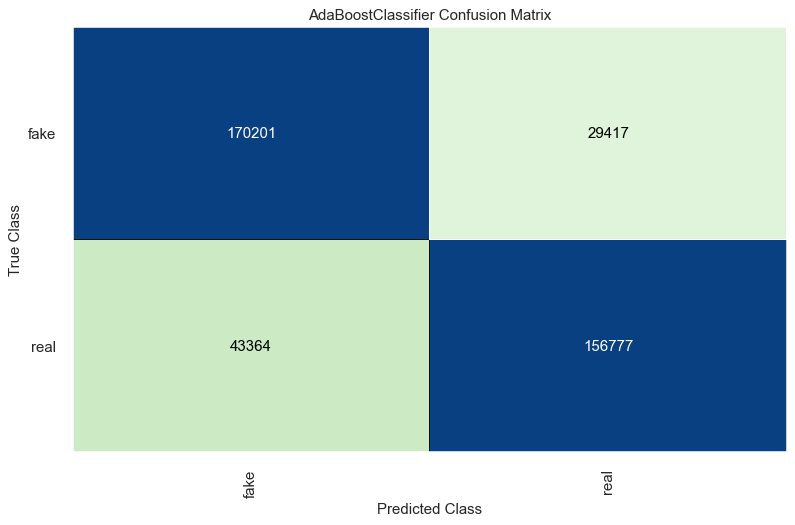

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
cm9 = ConfusionMatrix(ada, classes=classes, cmap='GnBu')
cm9.fit(X_train_norm, y_train)
cm9.score(X_test_norm, y_test)
cm9.show()

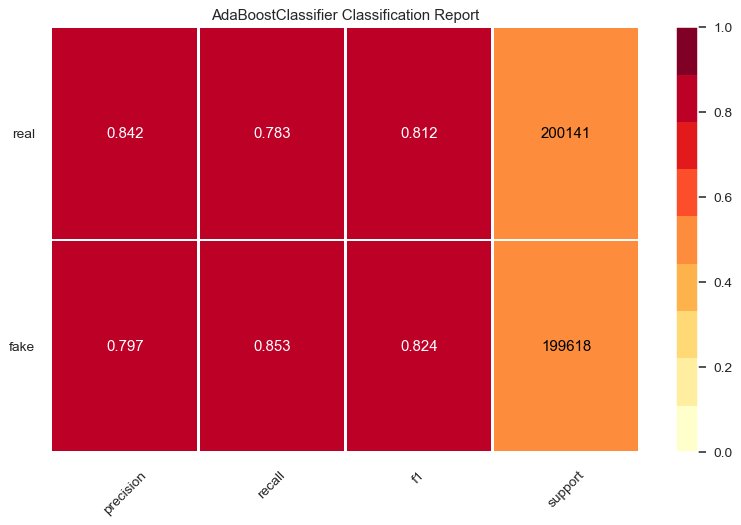

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [101]:
cr9 = ClassificationReport(ada, classes=classes, support=True)
cr9.fit(X_train_norm, y_train)
cr9.score(X_test_norm, y_test)
cr9.show()

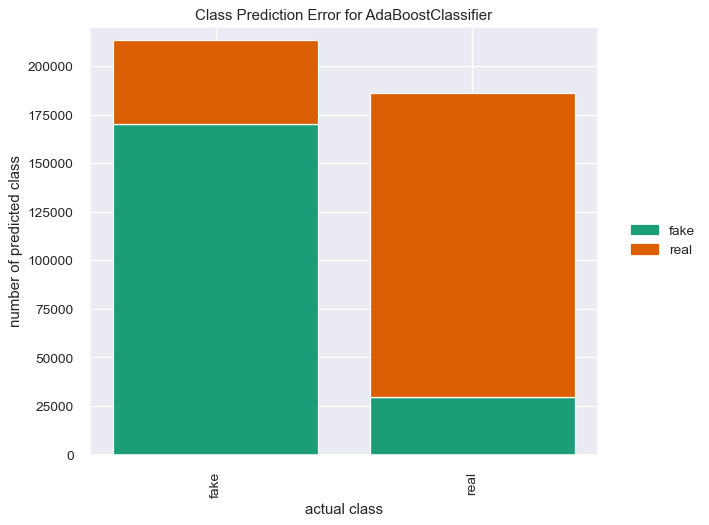

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [102]:
cpe9 = ClassPredictionError(ada, classes=classes)
cpe9.fit(X_train_norm, y_train)
cpe9.score(X_test_norm, y_test)
cpe9.show()

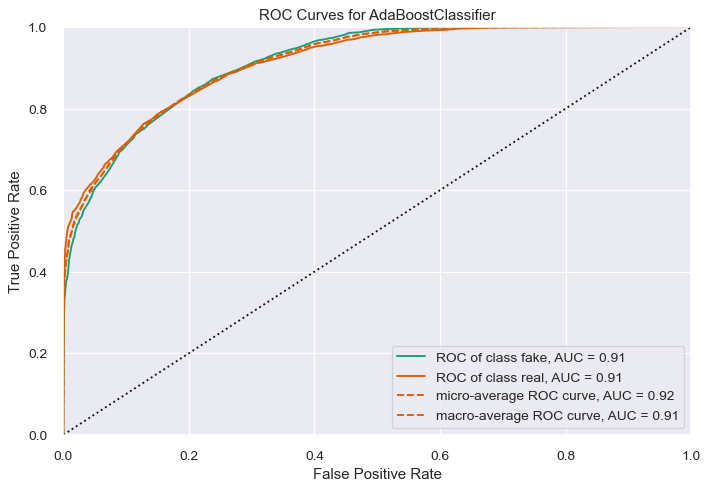

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [103]:
rocauc9 = ROCAUC(ada, classes=classes)
rocauc9.fit(X_train_norm, y_train)
rocauc9.score(X_test_norm, y_test)
rocauc9.show()

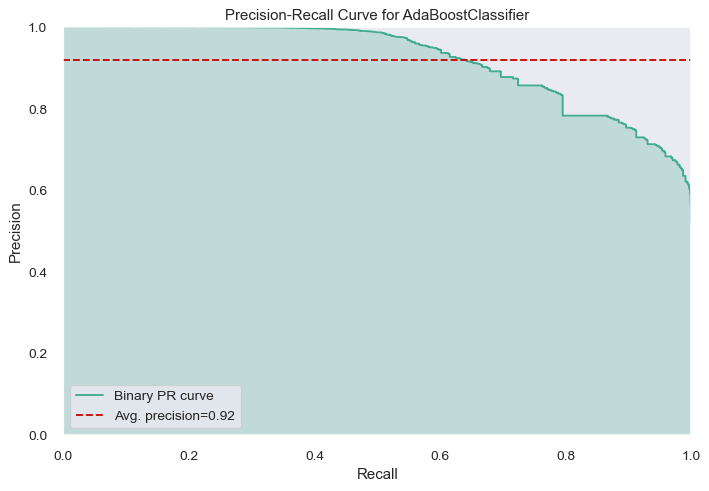

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [104]:
prc9 = PrecisionRecallCurve(ada)
prc9.fit(X_train_norm, y_train)
prc9.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc9.show()

10. Multiple Layer Perceptron Classifier

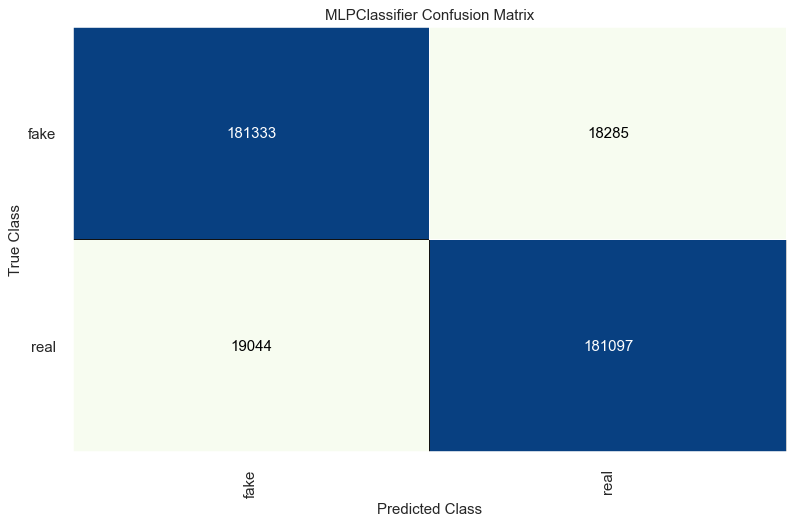

<AxesSubplot:title={'center':'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [105]:
cm10 = ConfusionMatrix(mlp, classes=classes, cmap='GnBu')
cm10.fit(X_train_norm, y_train)
cm10.score(X_test_norm, y_test)
cm10.show()

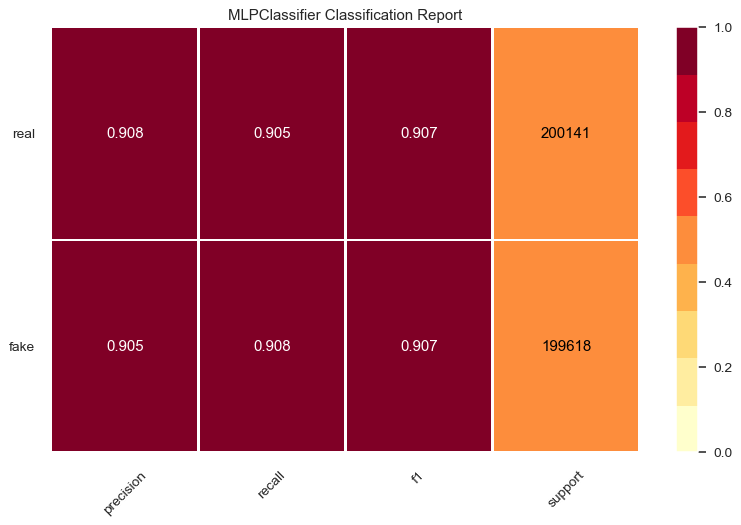

<AxesSubplot:title={'center':'MLPClassifier Classification Report'}>

In [106]:
cr10 = ClassificationReport(mlp, classes=classes, support=True)
cr10.fit(X_train_norm, y_train)
cr10.score(X_test_norm, y_test)
cr10.show()

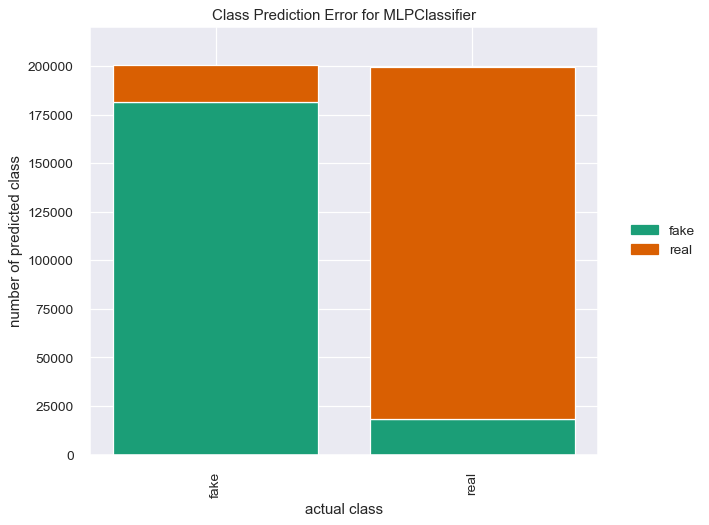

<AxesSubplot:title={'center':'Class Prediction Error for MLPClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [107]:
cpe10 = ClassPredictionError(mlp, classes=classes)
cpe10.fit(X_train_norm, y_train)
cpe10.score(X_test_norm, y_test)
cpe10.show()

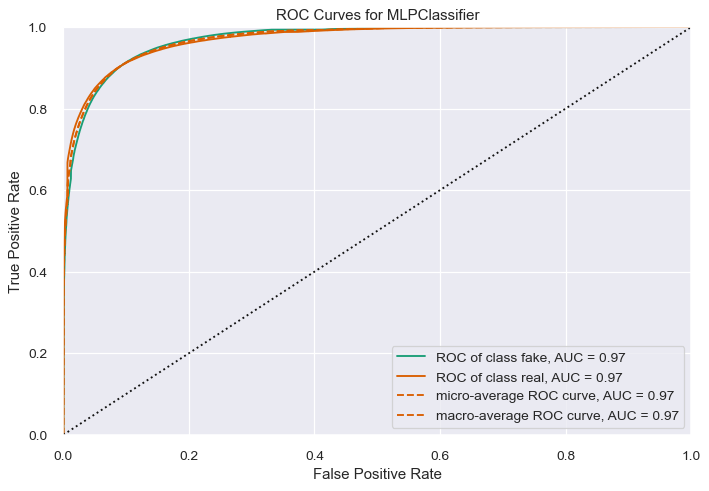

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [108]:
rocauc10 = ROCAUC(mlp, classes=classes)
rocauc10.fit(X_train_norm, y_train)
rocauc10.score(X_test_norm, y_test)
rocauc10.show()

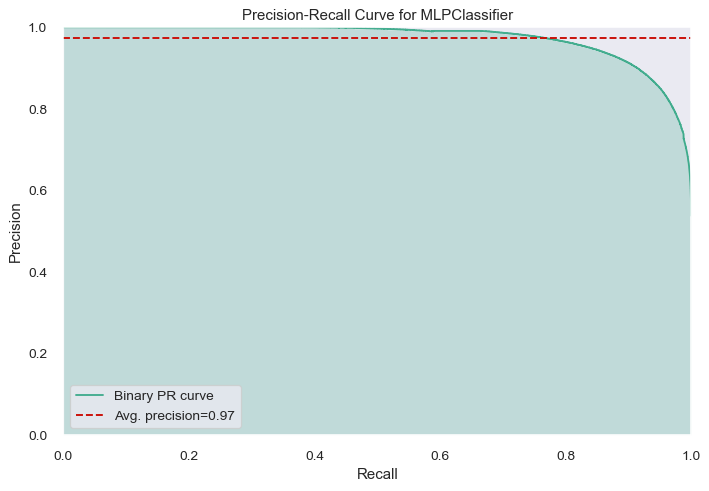

<AxesSubplot:title={'center':'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [109]:
prc10 = PrecisionRecallCurve(mlp)
prc10.fit(X_train_norm, y_train)
prc10.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc10.show()

11. LightGBClassifier

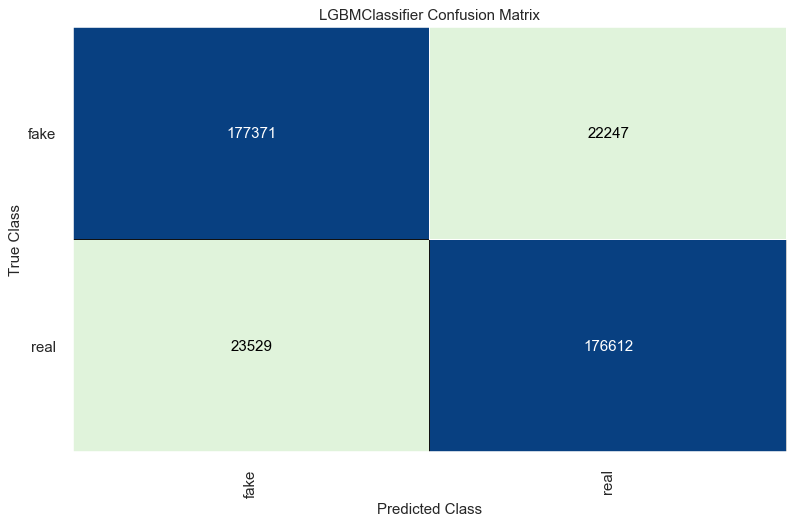

<AxesSubplot:title={'center':'LGBMClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [110]:
cm11 = ConfusionMatrix(lgb, classes=classes, cmap='GnBu')
cm11.fit(X_train_norm, y_train)
cm11.score(X_test_norm, y_test)
cm11.show()

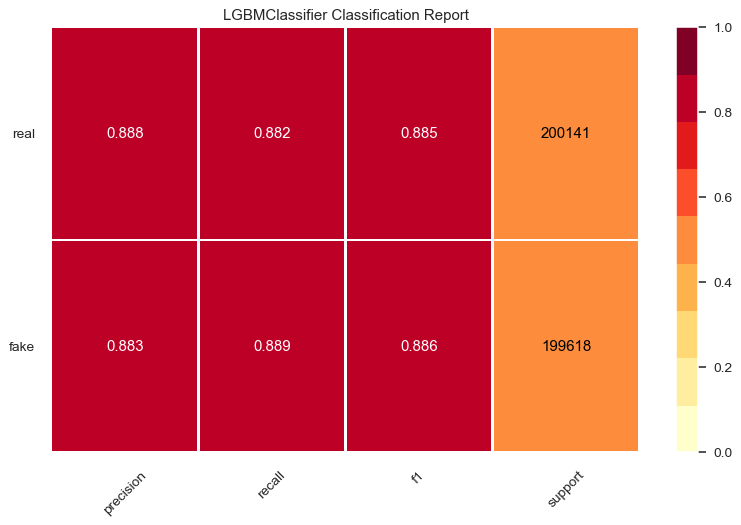

<AxesSubplot:title={'center':'LGBMClassifier Classification Report'}>

In [111]:
cr11 = ClassificationReport(lgb, classes=classes, support=True)
cr11.fit(X_train_norm, y_train)
cr11.score(X_test_norm, y_test)
cr11.show()

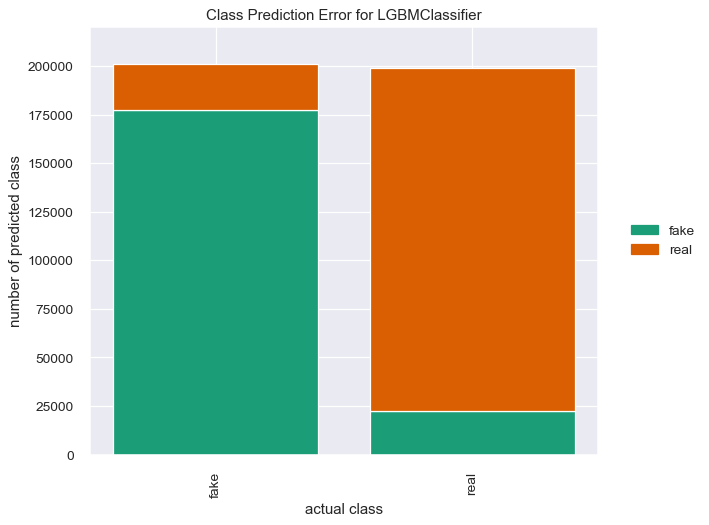

<AxesSubplot:title={'center':'Class Prediction Error for LGBMClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [112]:
cpe11 = ClassPredictionError(lgb, classes=classes)
cpe11.fit(X_train_norm, y_train)
cpe11.score(X_test_norm, y_test)
cpe11.show()

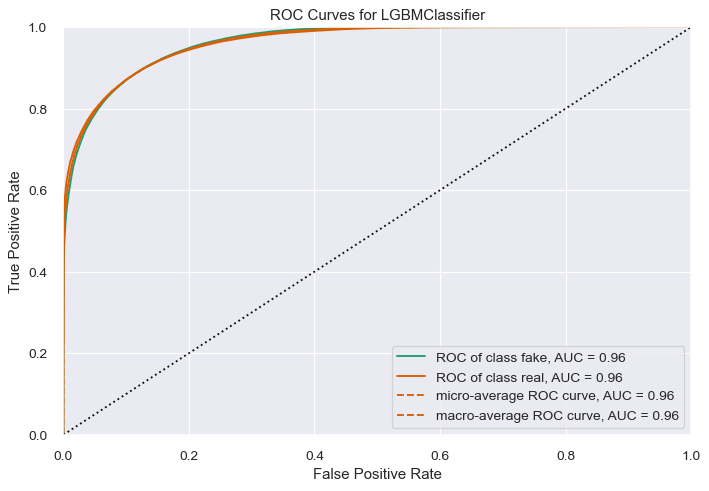

<AxesSubplot:title={'center':'ROC Curves for LGBMClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [113]:
rocauc11 = ROCAUC(lgb, classes=classes)
rocauc11.fit(X_train_norm, y_train)
rocauc11.score(X_test_norm, y_test)
rocauc11.show()

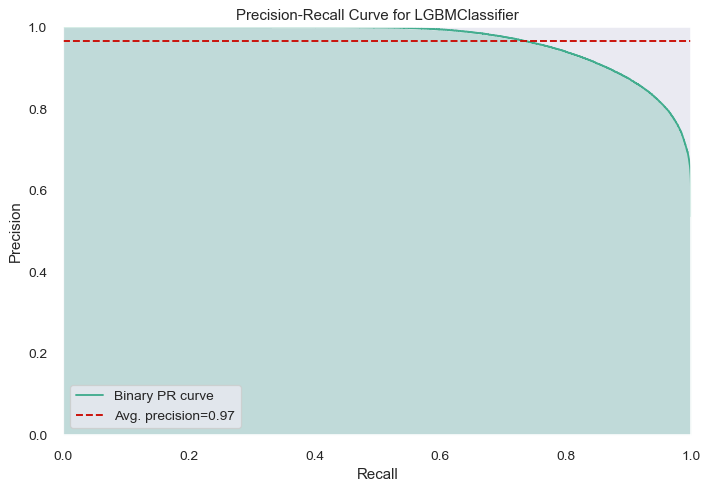

<AxesSubplot:title={'center':'Precision-Recall Curve for LGBMClassifier'}, xlabel='Recall', ylabel='Precision'>

In [114]:
prc11 = PrecisionRecallCurve(lgb)
prc11.fit(X_train_norm, y_train)
prc11.score(X_test_norm, y_test)
plt.legend(loc='lower right', fontsize=12)
prc11.show()

12.  Deep Neural Network

In [115]:
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_nn)
print('ROC AUC: %f' % auc)


# confusion matrix
print('\nConfusion Matrix:')
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print('\n')

# classification report
report = classification_report(y_test, y_pred, target_names=['fake','real'])
print(report)

Accuracy: 0.906601
Precision: 0.912546
Recall: 0.899666
F1 score: 0.906060
ROC AUC: 0.906610

Confusion Matrix:
[[182362  17256]
 [ 20081 180060]]


              precision    recall  f1-score   support

        fake       0.90      0.91      0.91    199618
        real       0.91      0.90      0.91    200141

    accuracy                           0.91    399759
   macro avg       0.91      0.91      0.91    399759
weighted avg       0.91      0.91      0.91    399759



### Model Selection

The accuracy score achieved using Logistic Regression is: 88.36 %
The accuracy score achieved using Multinomial Naive Bayes is: 79.33 %
The accuracy score achieved using Linear SVC is: 88.16 %
The accuracy score achieved using Decision Tree is: 83.22 %
The accuracy score achieved using Random Forest is: 90.33 %
The accuracy score achieved using Extra Trees is: 89.82 %
The accuracy score achieved using XGBoost is: 89.14 %
The accuracy score achieved using SGDClassifier is: 87.25 %
The accuracy score achieved using AdaBoost is: 81.79 %
The accuracy score achieved using MLPClassifier is: 90.66 %
The accuracy score achieved using LightGBM is: 88.55 %
The accuracy score achieved using KerasNN is: 90.66 %


<AxesSubplot:xlabel='Accuracy score', ylabel='Algorithms'>

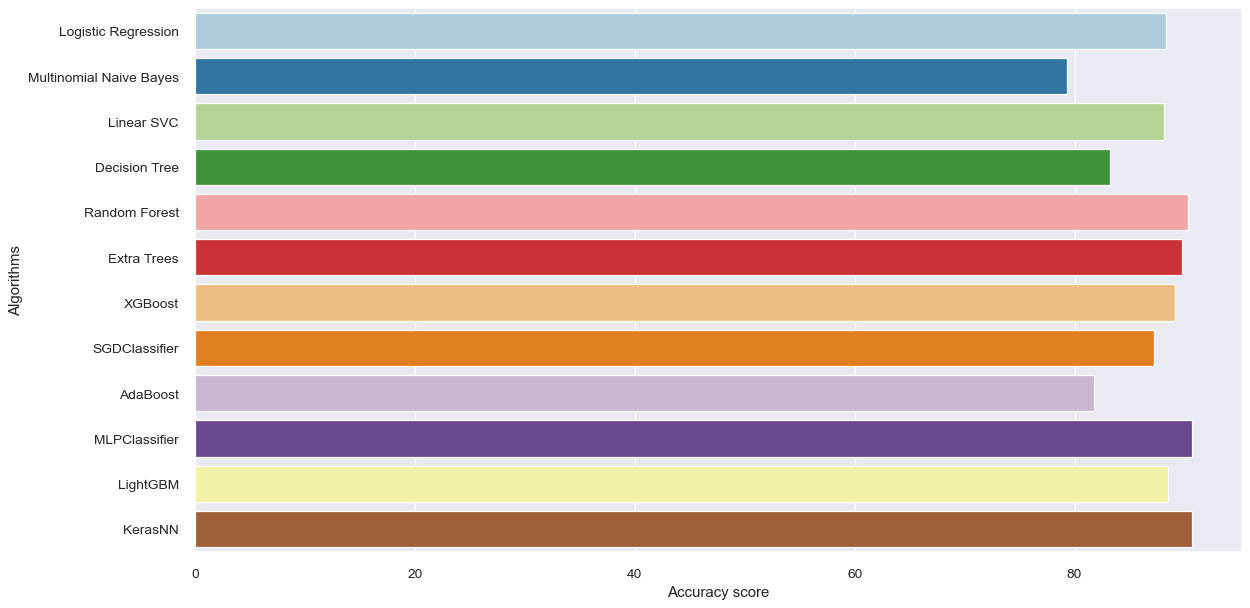

In [116]:
#model final output


scores = [score_lr,score_nb,score_lsvc,score_dt,score_rf,score_et, score_xgb,score_sgdc, score_ad, score_mlp, score_lgb, score_nn]
algorithms = ["Logistic Regression","Multinomial Naive Bayes","Linear SVC","Decision Tree","Random Forest","Extra Trees","XGBoost","SGDClassifier","AdaBoost","MLPClassifier","LightGBM",'KerasNN']    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
	
	
	
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Algorithms")
plt.xlabel("Accuracy score")

sns.barplot(y=algorithms,x=scores, orient='h', palette='Paired')


| Algorithims            | **Accuracy Score (%)** | **Recall**(%) | **True Positive(TP)** |
| ---------------------- | ---------------------- | ------------- | --------------------- |
| Individual             |                        |               |                       |
| - Logistics Regression | 88.26                  | 89.00         | 177749                |
| - Multinomial NB       | 79.33                  | ***95.00***   | ***189776***          |
| - Linear SVC           | 88.16                  | 89.50         | 178664                |
| - SGDClassifier        | 87.25                  | 90.00         | 178655                |
| - Decision Tree        | 83.22                  | 75.90         | 151599                |
| Ensemble               |                        |               |                       |
| - Random Forest        | 90.33                  | 92.50         | 184616                |
| - Extra Trees          | 89.82                  | 93.20         | 186067                |
| - Adaboost             | 81.79                  | 85.30         | 170201                |
| - XGBoost              | 89.14                  | 89.30         | 178351                |
| - LightGBM             | 88.55                  | 88.90         | 177371                |
| Neural Network         |                        |               |                       |
| - MLP Classifier       | ***90.66***            | 90.80         | 181333                |
| - Deep NN (Keras)      | ***90.66***            | 91.00         | 182362                |

___

# Conclusions and Recommendations

___

Among all the classifiers used in this project, the neural network algorithims (MLP classifier and Deep NN) has the best performance when the accuracy score was used a the primary model evaluation criteria. However, when recall of the fake class is considered, multinomial NB performed the best because it was able to correctly predict the highest number of the fake news articles.

On the other hand, if all performance evaluation criteria are considered, the deep neural network with three hidden layers is the best machine learning classifier that best predict and distinguishes fake news from real news articles.

With the highest classification accuracy score of 90.66%, recall of 91%, the Deep NN classifier is perfect for distinguishing word patterns in fake news articles. 

___


# References

___

# 